# SOPHY Database Sandbox
Sample code used to test features and code snippets

In [33]:
import sqlite3
import os
import pandas as pd
import xlsxwriter
import pyworms
import openpyxl
from openpyxl import load_workbook
import cartopy
from pandas import DataFrame
import matplotlib.pyplot as plt 
import scipy.io as sio
from shapely.geometry import Polygon, Point, MultiPoint, LineString, CAP_STYLE, JOIN_STYLE, mapping
import cartopy.crs as ccrs
import fiona
import numpy as np
import shapely
import cartopy.io.shapereader as shpreader
import matplotlib.path as mpath
import geopandas as gpd
import pyproj
import xarray as xr
import rioxarray
import rasterio
from shapely.ops import transform
from shapely.validation import make_valid
import cmocean

In [ ]:
con = sqlite3.connect("sophy.db")
cur = con.cursor()

Sample functions to use

In [ ]:
# functions with common use cases
# results at lat long
# distance and time for lat long
# take in a list of values that represent a path and get all results (within certain range of provided values )
# fronts, sectors
# default definition of sectors, fronts that can be easily updated 

# filter by front zones and sectors


Read from the SOPHY database and receive a DataFrame <br />
Write SQLite queries directly

In [ ]:
import warnings


query = "select scientific_name from microscopy"
pd.read_sql_query(query, con)

In [ ]:
pd.read_pickle(r"C:\users\ayush nag\Downloads\data\02_intermediate\SOCCOM_bgc_argo_float_data\all_floatdata_analyzed.pkl")

In [ ]:
# map_proj = ccrs.SouthPolarStereo()
# fig = plt.figure(figsize=[20, 20])  # inches
# ax = plt.subplot(projection=map_proj)
# ax.set_extent([-180, 180, -90, -39.4], ccrs.PlateCarree())
# fig.subplots_adjust(bottom=0.05, top=0.95, left=0.04, right=0.95, wspace=0.02)
#
# ax.add_feature(cartopy.feature.LAND)
# ax.add_feature(cartopy.feature.COASTLINE)
# ax.gridlines(draw_labels=True)

# Writes the Kim & Orsi 2014 fronts to a shapefile
mat_data: dict = sio.loadmat("../data/fronts/ys_fronts.mat")
# fronts = ([[lat1, lon1], [lat2, lon2]], [[lat1, lon1], ...], ...)
orsi_fronts: tuple = mat_data['ys_fronts'].tolist()[0][0]
# filters out extra data and only keeps the 4 Southern Ocean fronts
orsi_fronts = orsi_fronts[:4]
colors = ['c', 'b', 'g', 'r']
wgs84 = pyproj.CRS('EPSG:4326')
utm = pyproj.CRS('EPSG:9354')

In [ ]:
# front = orsi_fronts[0].T
# # remove points where latitude is negative (range is [0, 360])
# extra = np.where(front[0] < 0)
# lat, lon = np.delete(front[0], extra), np.delete(front[1], extra)
# lat, lon = lat[~np.isnan(lat)], lon[~np.isnan(lon)]
# # lat, lon = np.append(lat, lat[0]), np.append(lon, lon[0])
# points = np.stack((lat, lon), axis=-1)
# # new_points = map_proj.transform_points(ccrs.PlateCarree(), lat, lon)
# # points = np.round(points, 3)
# # poly = Polygon(points)
# plt.plot(lat, lon)
# plt.show()
# # ax.plot(front[0], front[1], marker='o', linestyle='', color=colors[i], transform=ccrs.PlateCarree())
temp = [0, 1550, 1734, 1488]
transformed: list = []

for f in orsi_fronts:
    front = f.T
    extra = np.where(front[0] < 0)
    lat, lon = np.delete(front[0], extra), np.delete(front[1], extra)
    lat, lon = lat[~np.isnan(lat)], lon[~np.isnan(lon)]
    x = np.stack((lat, lon))
    plt.plot(lat, lon)
plt.show()


In [ ]:
front = orsi_fronts[0].T
extra = np.where(front[0] > 180)
lat, lon = np.delete(front[0], extra), np.delete(front[1], extra)
lat, lon = lat[~np.isnan(lat)], lon[~np.isnan(lon)]
misc = np.arange(20, 40)
lat, lon = np.delete(lat, misc), np.delete(lon, misc)
polygon_geom = Polygon(zip(lat, lon))
# ax.add_geometries([polygon_geom], crs=ccrs.SouthPolarStereo(), facecolor='b', edgecolor='red', alpha=0.8)
# plt.show()

In [8]:
df = pd.read_csv("../data/datasets/lter.csv", encoding='unicode_escape')
lter_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs='EPSG:4326')
lter_gdf = lter_gdf.to_crs(epsg=3031, inplace=True)
geolabel.label_zones(df, 'Latitude', 'Longitude')[['Latitude', 'Longitude', 'zone']]

,Latitude,Longitude,zone
0,-64.83333,-64.05167,SOZ
1,-64.83333,-64.05167,SOZ
2,-64.83333,-64.05167,SOZ
3,-64.83333,-64.05167,SOZ
4,-64.83333,-64.05167,SOZ
...,...,...,...
9382,-61.80167,-57.13900,PFZ
9383,-61.97383,-57.14250,PFZ
9384,-62.09550,-57.36767,PFZ
9385,-62.17417,-57.73450,PFZ


In [1]:
gpd.read_file(geolabel.zones_shapefile)

NameError: name 'gpd' is not defined

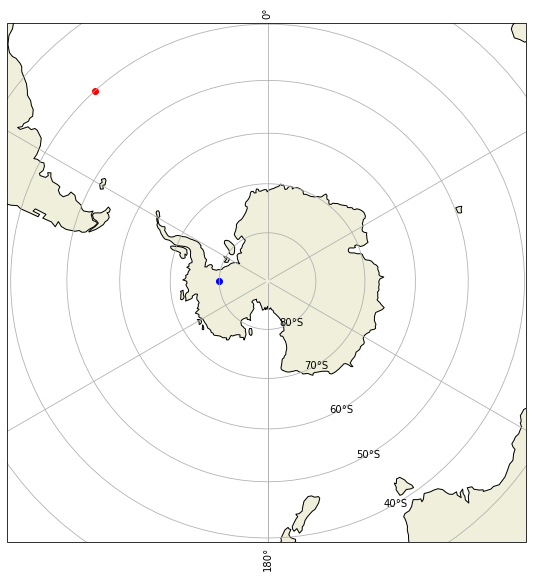

In [34]:
map_proj = ccrs.SouthPolarStereo()
fig = plt.figure(figsize=[8, 8])  # inches
ax = plt.subplot(projection=map_proj)
ax.set_extent([-180, 180, -90, -39.4], ccrs.PlateCarree())
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.04, right=0.95, wspace=0.02)

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.COASTLINE)
ax.gridlines(draw_labels=True)

# lon vs lat
ax.plot(270, -80, marker='o', linestyle='', color='b', transform=ccrs.PlateCarree())
ax.plot(-3950000 - 50000, +4350000 + 50000, marker='o', linestyle='', color='r', transform=ccrs.SouthPolarStereo())
# ax.plot(-20, -39.23, marker='o', linestyle='', color='g', transform=ccrs.PlateCarree())
# ax.plot(-90, -41.23, marker='o', linestyle='', color='b', transform=ccrs.PlateCarree())
# ax.plot(-160, -41.23, marker='o', linestyle='', color='y', transform=ccrs.PlateCarree())
# ax.plot(130, -41, marker='o', linestyle='', color='c', transform=ccrs.PlateCarree())
# x = np.arange(-3950000, +3950000, +dx)
# y = np.arange(+4350000, -3950000, -dy)
# ax.plot(170, -41, marker='o', linestyle='', color='c', transform=ccrs.PlateCarree())

# sectors: list = []
# sectors.append(Polygon([(60, -40), (-20, -40), (0, -90)]))
# sectors.append(Polygon([(-20, -40), (-90, -40), (0, -90)]))
# sectors.append(Polygon([(-90, -40), (-160, -40), (0, -90)]))
# sectors.append(Polygon([(-160, -40), (130, -40), (0, -90)]))
# sectors.append(Polygon([(130, -40), (60, -40), (0, -90)]))
#
# sectors_dict: dict = {'sector': ['A', 'B', 'C', 'D', 'E'], 'geometry': sectors}
# sectors_gdf = gpd.GeoDataFrame(sectors_dict, crs='EPSG:4326')
# sectors_gdf = sectors_gdf.to_crs(crs='EPSG:3031')
# sectors_gdf.plot()
plt.show()

<AxesSubplot:>

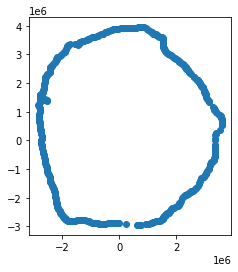

In [254]:
# Test alpha shape
ice = np.fromfile(geolabel.nsidc_sea_ice_file, dtype=np.uint8)
# Space between grid cells = 25km
dx = dy = 25000
# NSIDC Southern Hemisphere Grid Coordinates
x, y = np.arange(-3950000, +3950000, +dx), np.arange(+4350000, -3950000, -dy)
# Creates 316x332 grid and converts to list of points
list_grid = np.dstack(np.meshgrid(x, y)).reshape(-1, 2)
# Keep only concentrations [15, 25] since 15 is minimum for sea-ice, found 25 as optimal for alphashape
points = list_grid[np.logical_and(15 <= ice, ice <= 17)].T
sie_gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(x=points[0], y=points[1]), crs='EPSG:3031')
sie_gdf.plot()
# Make convex hull of points. Generating alpha shape takes ~8 minutes
# alpha: gpd.GeoDataFrame = alphashape.alphashape(sie_gdf)
# alpha = sie_gdf.convex_hull
# alpha.plot()

<GeoAxesSubplot:>

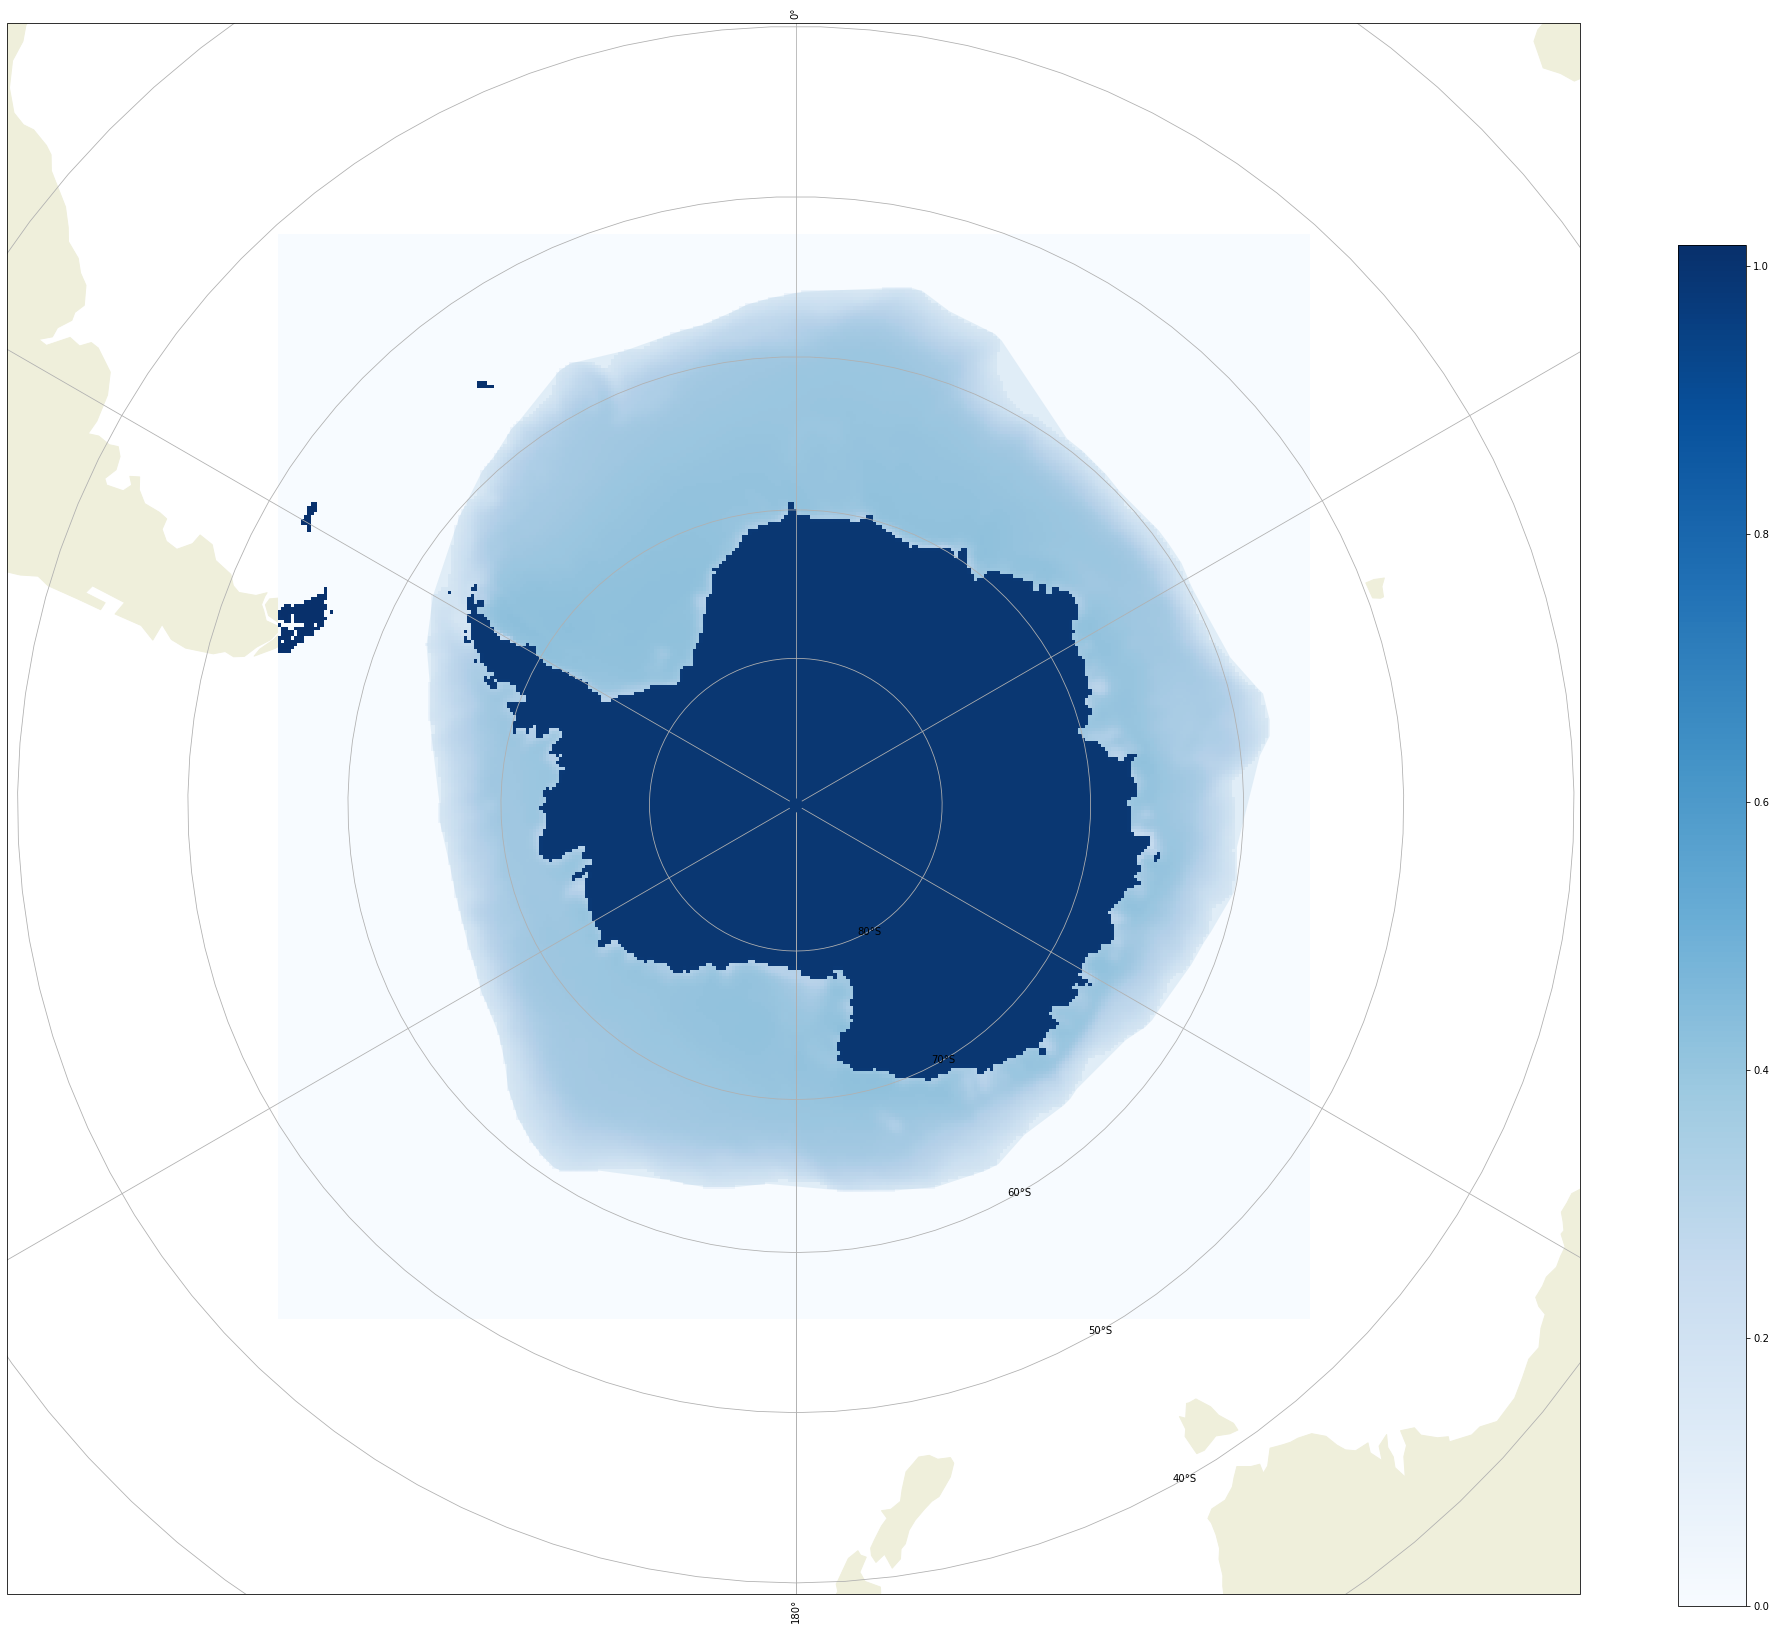

In [323]:
# Author: Filipe Fernandes
f = open(r"../data/sea_ice/mean.sep.1979-2021.s", "r")
ice = np.fromfile(f, dtype=np.uint8)
ice=ice.reshape(332,316)
#Convert to the fractional parameter range of 0.0 to 1.0
ice = ice/250.
#mask all land and missing values
# ice=np.ma.masked_greater(ice,1.0)
# ice=np.ma.masked_less(ice, 0.15)
#Show ice concentration
# plt.imshow(ice)
# GeoLabel.plot_nsidc_sie()
map_proj = ccrs.SouthPolarStereo()
fig = plt.figure(figsize=[30, 30])  # inches
ax = plt.subplot(projection=map_proj)
ax.set_extent([-180, 180, -90, -39.4], ccrs.PlateCarree())
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.04, right=0.95, wspace=0.02)

ax.add_feature(cartopy.feature.LAND)
# ax.add_feature(cartopy.feature.COASTLINE)
ax.gridlines(draw_labels=True)

dx = dy = 25000

x = np.arange(-3950000, +3950000, +dx)
y = np.arange(+4350000, -3950000, -dy)
points = np.dstack(np.meshgrid(x, y)).reshape(-1, 2).T
cs = ax.pcolormesh(x, y, ice, cmap=plt.cm.Blues, transform=ccrs.SouthPolarStereo())
fig.colorbar(cs, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7)
# pd.read_file(GeoLabel.zones_shapefile).drop([0, 1, 2, 3]).exterior.plot(ax=ax)
# alph.plot(ax=ax, alpha=0.1)
# GeoLabel.get_sie()

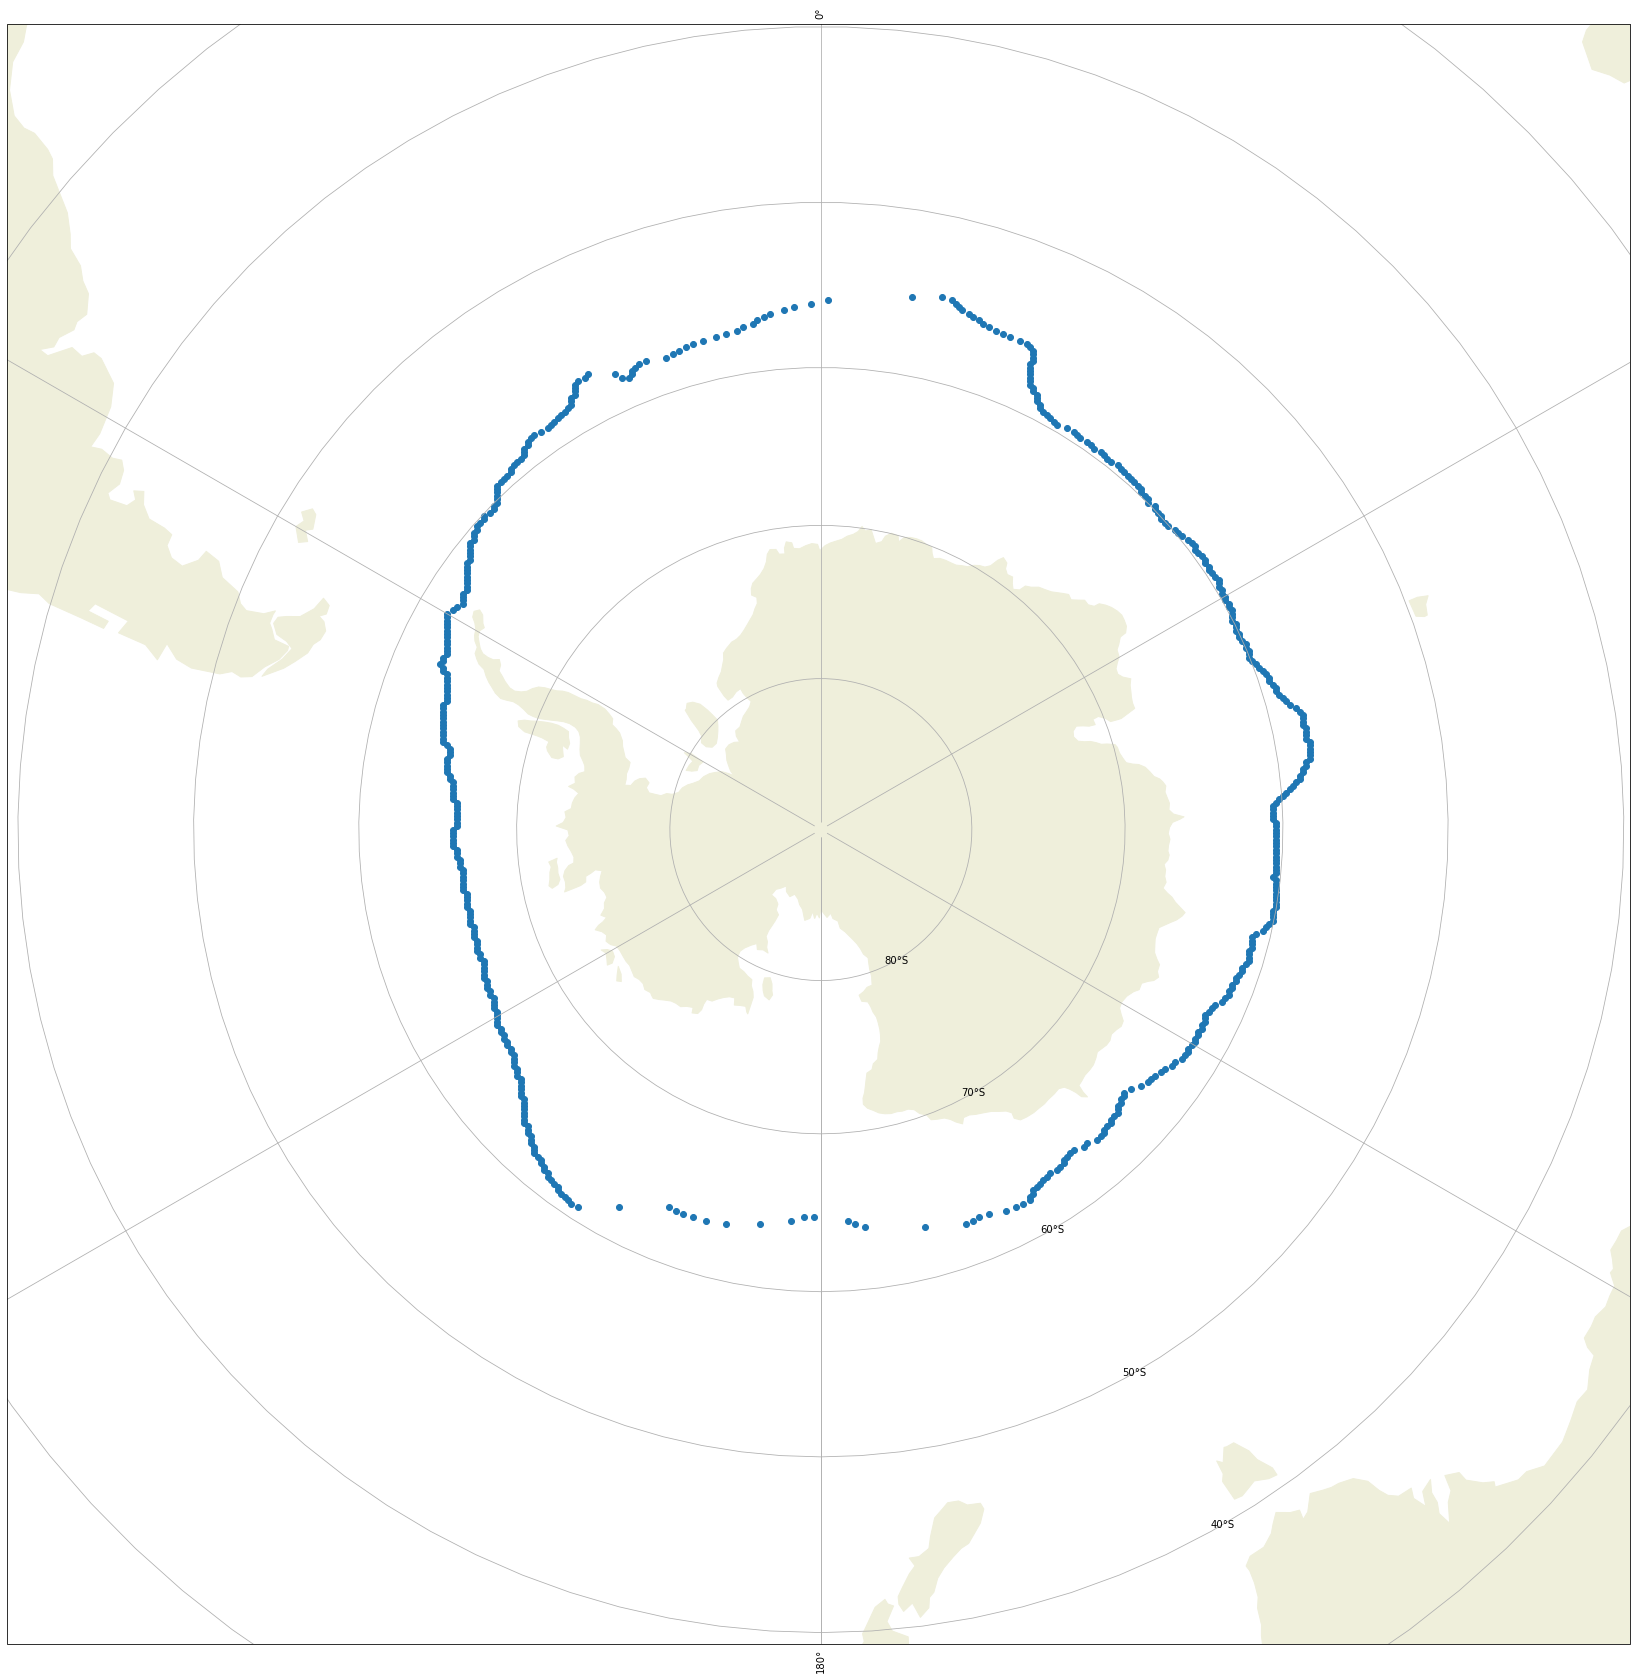

In [15]:
f = open(r"../data/sea_ice/mean.sep.1979-2021.s", "r")
ice = np.fromfile(f, dtype=np.uint8)
# ice = np.ma.masked_greater(ice, 100)
edge: list = []
water: bool = True
for i, val in enumerate(ice):
    if val < 100:
        if (water and val >= 15) or (not water and val == 0):
            edge.append(i)
        water = val == 0
# edge
map_proj = ccrs.SouthPolarStereo()
fig = plt.figure(figsize=[25, 25])  # inches
ax = plt.subplot(projection=map_proj)
ax.set_extent([-180, 180, -90, -39.4], ccrs.PlateCarree())
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.04, right=0.95, wspace=0.02)

ax.add_feature(cartopy.feature.LAND)
# ax.add_feature(cartopy.feature.COASTLINE)
ax.gridlines(draw_labels=True)
p = np.dstack(np.meshgrid(x, y)).reshape(-1, 2)
c = p[edge].T
ax.scatter(c[0], c[1], transform=ccrs.SouthPolarStereo())

array([[-179.0036521 ,  -63.97431599],
       [-177.51044708,  -63.95434498],
       [-175.56352551,  -63.68313205],
       ...,
       [ 173.71310664,  -63.16657855],
       [ 175.11479743,  -63.44758989],
       [ 176.05481377,  -63.69910835]])

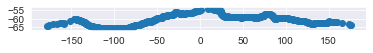

In [15]:
# map_proj = ccrs.SouthPolarStereo()
# fig = plt.figure(figsize=[25, 25])  # inches
# ax = plt.subplot(projection=map_proj)
# ax.set_extent([-180, 180, -90, -39.4], ccrs.PlateCarree())
# fig.subplots_adjust(bottom=0.05, top=0.95, left=0.04, right=0.95, wspace=0.02)
#
# ax.add_feature(cartopy.feature.LAND)
# # ax.add_feature(cartopy.feature.COASTLINE)
# ax.gridlines(draw_labels=True)
#
project = pyproj.Transformer.from_crs(pyproj.CRS('EPSG:4326'), pyproj.CRS('EPSG:3031'), always_xy=True).transform
f = open(r"../data/sea_ice/mean.sep.1979-2021.s", "r")
ice = np.fromfile(f, dtype=np.uint8)
edge: list = []
water: bool = True
for i, val in enumerate(ice):
    if val < 100:
        if (water and val >= 15) or (not water and val == 0):
            edge.append(i)
        water = val == 0

dx = dy = 25000

x = np.arange(-3950000, +3950000, +dx)
y = np.arange(+4350000, -3950000, -dy)

p = np.dstack(np.meshgrid(x, y)).reshape(-1, 2)
c = p[edge].T



extent_line = gpd.points_from_xy(x=c[0], y=c[1], crs='EPSG:3031').to_crs(crs='EPSG:4326')
gpd.GeoSeries(data=extent_line).plot()
p = np.vstack((extent_line.x, extent_line.y)).T
# sie3 = Polygon(p[p[:, 0].argsort()])
# sie4 = Polygon(np.sort(p, axis=0))
# transform(project, sie4)
p[p[:, 0].argsort()]
# np.sort(p, axis=0)

# ax.scatter(c[0], c[1], transform=ccrs.SouthPolarStereo())
# sie = MultiPoint(c)

# gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(x=c[0], y=c[1], crs='EPSG:3031')).to_crs(crs='EPSG:4326')
# gdf.plot()
# gpd.GeoDataFrame({'col': ['name1'], 'geometry': []}, crs='EPSG:4326').to_crs('EPSG:3031').plot()

# alph: gpd.GeoDataFrame = alphashape.alphashape(gdf)
# alph.plot()
# sie.convex_hull
# transform(project, sie)
# gpd.GeoDataFrame({'col': ['name1'], 'geometry': [sie]}, crs='EPSG:3031').plot()
# water should be true when over water
# if water is true and val >= 15 then add
# if water is false and val <= 0 then add


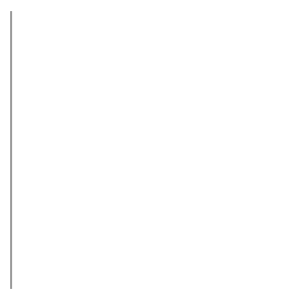

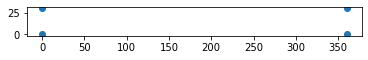

In [43]:
points = np.array([(0, 0), (0, 30), (360, 30), (360, 0)])
perimeter = gpd.points_from_xy(x=points.T[0], y=points.T[1], crs='EPSG:4326')
gpd.GeoSeries(data=perimeter).plot()
transform(project, Polygon(points))

hi


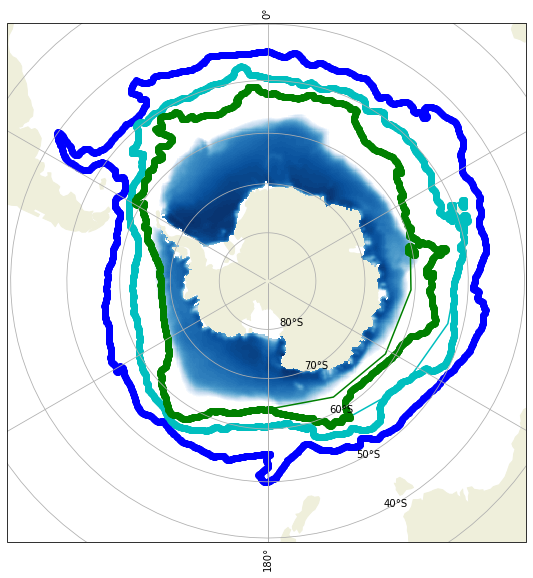

In [7]:
f = open(r"../data/sea_ice/mean.sep.1979-2021.s", "r")
ice = np.fromfile(f, dtype=np.uint8)
ice=ice.reshape(332,316)
#Convert to the fractional parameter range of 0.0 to 1.0
ice = ice/250.
#mask all land and missing values
ice=np.ma.masked_greater(ice,1.0)
ice=np.ma.masked_less(ice, 0.15)

map_proj = ccrs.SouthPolarStereo()
fig = plt.figure(figsize=[8, 8])  # inches
ax = plt.subplot(projection=map_proj)
ax.set_extent([-180, 180, -90, -39.4], ccrs.PlateCarree())
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.04, right=0.95, wspace=0.02)

ax.add_feature(cartopy.feature.LAND)
# ax.add_feature(cartopy.feature.COASTLINE)
ax.gridlines(draw_labels=True)

dx = dy = 25000

x = np.arange(-3950000, +3950000, +dx)
y = np.arange(+4350000, -3950000, -dy)
points = np.dstack(np.meshgrid(x, y)).reshape(-1, 2).T
cs = ax.pcolormesh(x, y, ice, cmap=plt.cm.Blues, transform=ccrs.SouthPolarStereo())
# ax.plot(points[0], points[1], marker='o', linestyle='', color='g', transform=ccrs.SouthPolarStereo())

mat_data: dict = sio.loadmat(geolabel.kim_orsi_file)
# mat_data = ([[lat1, lon1], [lat2, lon2]], [[lat1, lon1], ...], ...)
orsi_fronts: tuple = mat_data['ys_fronts'].tolist()[0][0]
# filters out extra data and only keeps the 4 Southern Ocean fronts
orsi_fronts = orsi_fronts[:3]
colors = ['b', 'c', 'g', 'r']
for i, orsi_front in enumerate(orsi_fronts):
    front = orsi_front.T
    # data has points [-180, 360] but [-180, 180] is duplicate of [0, 360]
    extra = np.where(front[0] > 180)
    # delete [180, 360]
    lat, lon = np.delete(front[0], extra), np.delete(front[1], extra)
    # remove NaN's
    lat, lon = lat[~np.isnan(lat)], lon[~np.isnan(lon)]
    ax.plot(lat, lon, marker='o', color=colors[i], transform=ccrs.PlateCarree())
plt.show()


In [152]:
ice = np.fromfile("../data/sea_ice/mean.sep.1979-2021.s", dtype=np.uint8)
edge = np.logical_and(15 <= ice, ice <= 25)
dx = dy = 25000
x = np.arange(-3950000, +3950000, +dx)
y = np.arange(+4350000, -3950000, -dy)
grid = np.dstack(np.meshgrid(x, y)).reshape(-1, 2)
points = grid[edge].T
gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(x=points[0], y=points[1]), crs='EPSG:3031')
# Generating alpha shape takes ~8 minutes
alpha: gpd.GeoDataFrame = alphashape.alphashape(gdf)
alpha
# ax.plot(points[0], points[1], marker='o', linestyle='', color='g', transform=ccrs.SouthPolarStereo())

C:\Users\Ayush Nag\miniconda3\envs\sophyenv\lib\site-packages\shapely\ops.py:42: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  source = iter(source)
C:\Users\Ayush Nag\miniconda3\envs\sophyenv\lib\site-packages\alphashape\optimizealpha.py:41: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return all([polygon.intersects(point) for point in points])


,geometry
0,"POLYGON ((-2600000.000 2125000.000, -2575000.0..."


In [175]:
shapes: dict = {}
world: gpd.GeoDataFrame = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.to_crs(epsg=3031)
antarctica: Polygon = world[world['continent'] == 'Antarctica']['geometry'].values[0]
south_america: Polygon = world[world['continent'] == 'South America']['geometry'].values[0]
project = pyproj.Transformer.from_crs(pyproj.CRS('EPSG:4326'), pyproj.CRS('EPSG:3031'),
                                      always_xy=True).transform

gray_mat: dict = sio.loadmat("../data/fronts/fronts_Gray.mat")
stf: Polygon = transform(project, Polygon(zip(gray_mat['lon_stf'][0], gray_mat['lat_stf'][0])))
shapes['STF'] = stf - south_america

# Writes the Kim & Orsi 2014 fronts to a shapefile
orsi_mat: dict = sio.loadmat('../data/fronts/ys_fronts.mat')
# fronts = ([[lat1, lon1], [lat2, lon2]], [[lat1, lon1], ...], ...)
orsi_fronts: tuple = orsi_mat['ys_fronts'].tolist()[0][0]
# filters out extra data and only keeps the 4 Southern Ocean fronts
orsi_fronts = orsi_fronts[:3]
front_names: tuple = ('SAF', 'PF', 'SACC')
# points from each front that follow a smooth contour (no holes in the front)
keep: tuple = ((44, 2633), (0, 2305), (0, 2614))
for i, orsi_front in enumerate(orsi_fronts):
    # convert np array to df
    front_df = pd.DataFrame(data=orsi_front, columns=['Latitude', 'Longitude'],
                            index=np.arange(len(orsi_front)))
    # remove extra points such as small holes in the front
    front_df = front_df.iloc[keep[i][0]:keep[i][1]]
    # data has points [-180, 360] but [-180, 180] is duplicate of [0, 360]
    front_df = front_df[front_df.Latitude <= 180]
    # make new polygon and add to list
    orsi_shp: Polygon = transform(project, Polygon(zip(front_df.Latitude, front_df.Longitude)))
    shapes[front_names[i]] = orsi_shp

# ice = np.fromfile("../data/sea_ice/mean.sep.1979-2021.s", dtype=np.uint8)
edge = (25 >= ice) & (ice <= 15)
dx = dy = 25000
x = np.arange(-3950000, +3950000, +dx)
y = np.arange(+4350000, -3950000, -dy)
grid = np.dstack(np.meshgrid(x, y)).reshape(-1, 2)
points = grid[edge].T
# gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(x=points[0], y=points[1]), crs='EPSG:3031')
# # Generating alpha shape takes ~8 minutes
# alpha: gpd.GeoDataFrame = alphashape.alphashape(gdf)
sie: Polygon = alpha['geometry'].values[0]
shapes['SIE'] = sie

fronts_gdf = gpd.GeoDataFrame({'front': shapes.keys(), 'geometry': shapes.values()}, crs='EPSG:3031')
fronts_gdf.to_file(geolabel.fronts_shapefile)

zones: dict = {'zone': ['SAZ', 'PFZ', 'ASZ', 'SOZ', 'SIZ'], 'geometry': [shapes['STF'] - shapes['SAF'],
                                                                         shapes['SAF'] - shapes['PF'],
                                                                         shapes['PF'] - shapes['SACC'],
                                                                         shapes['SACC'] - shapes['SIE'],
                                                                         shapes['SIE'] - antarctica]}
zones_gdf = gpd.GeoDataFrame(zones, crs='EPSG:3031')
zones_gdf.to_file(geolabel.zones_shapefile)
zones_gdf.plot()

C:\Program Files\JetBrains\PyCharm 2022.2\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_xml.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  xml_shape = ' shape="%s"' % make_valid_xml_value("%s" % str(len(v)))
C:\Program Files\JetBrains\PyCharm 2022.2\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_xml.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  xml_shape = ' shape="%s"' % make_valid_xml_value("%s" % str(len(v)))
C:\Program Files\JetBrains\PyCharm 2022.2\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_xml.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Chec

KeyboardInterrupt: 

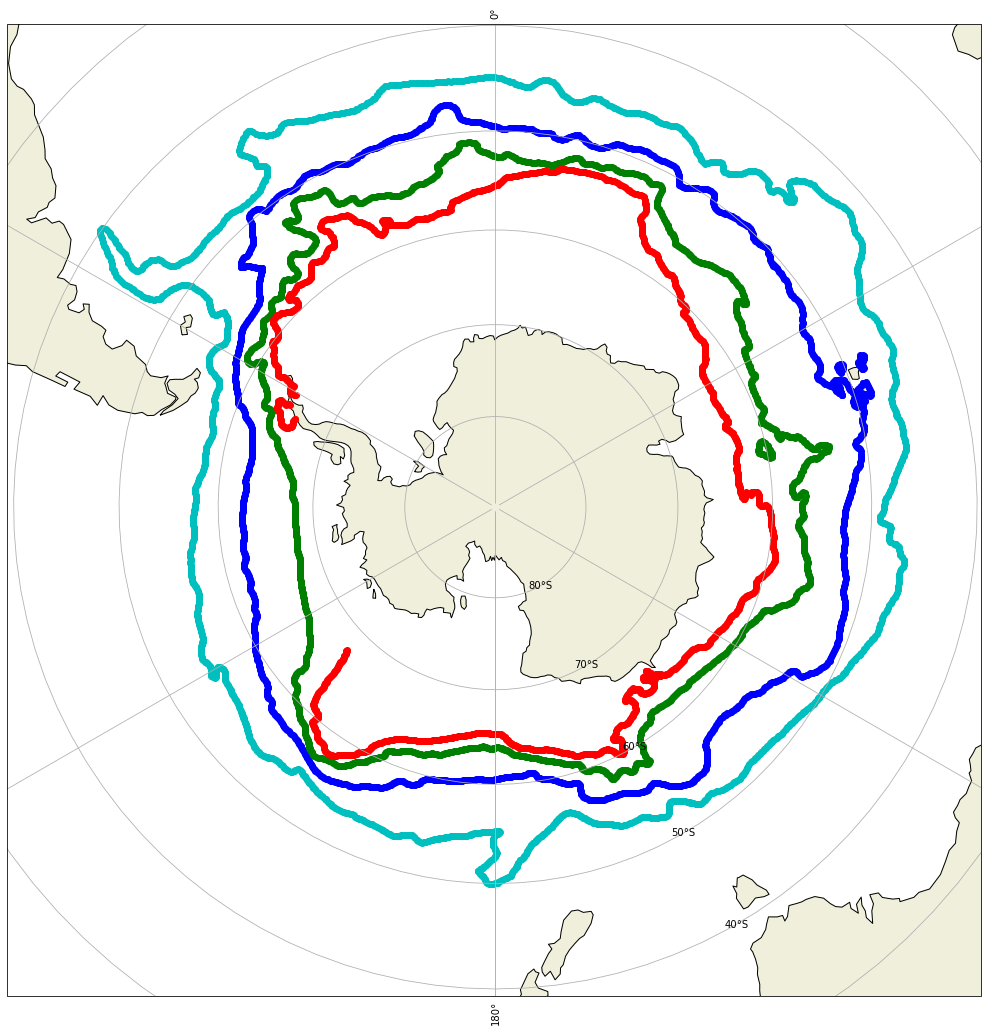

In [3]:
geolabel.plot_orsi_fronts()

In [7]:
# gpd.read_file("../data/shapefiles/zones/so_zones.shp").plot(color=['r','g','b','y','c'])
project: pyproj.Transformer = pyproj.Transformer.from_crs(pyproj.CRS('EPSG:4326'), pyproj.CRS('EPSG:3031'),
                                                       always_xy=True)
project.transform

<bound method Transformer.transform of <Concatenated Operation Transformer: pipeline>
Description: axis order change (2D) + Antarctic Polar Stereographic
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)>

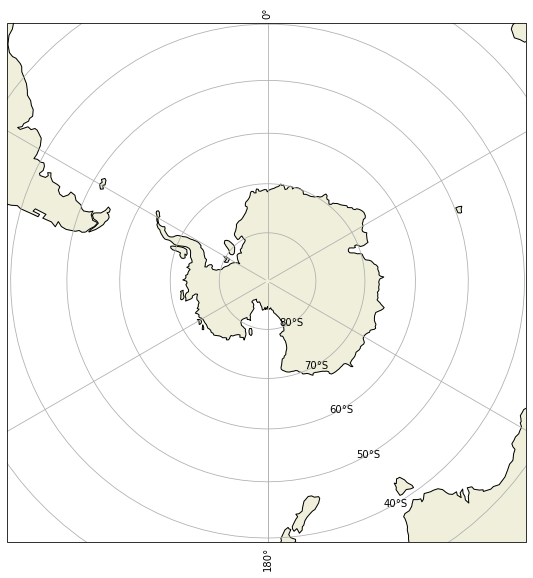

In [4]:
map_proj = ccrs.SouthPolarStereo()
fig = plt.figure(figsize=[8, 8])  # inches
ax = plt.subplot(projection=map_proj)
ax.set_extent([-180, 180, -90, -39.4], ccrs.PlateCarree())
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.04, right=0.95, wspace=0.02)

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.COASTLINE)
ax.gridlines(draw_labels=True)

# mat = sio.loadmat(r"C:\Users\Ayush Nag\Downloads\fronts_Gray.mat")
# project = pyproj.Transformer.from_crs(pyproj.CRS('EPSG:4326'), pyproj.CRS('EPSG:3031'), always_xy=True).transform
# p = transform(project, Polygon(zip(mat['lon_stf'][0], mat['lat_stf'][0])))
# # world: gpd.GeoDataFrame = gpd.read_file('../data/shapefiles/world/world.shp')
# world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
# gdf = world.to_crs(epsg=3031)
# gdf: gpd.GeoDataFrame = gdf[gdf['continent'] == 'South America']
# shp: Polygon = gdf['geometry'].values[0]

# sie = gpd.read_file('../data/shapefiles/fronts/so_fronts.shp')['geometry'].values[3]
# thing = transform(project, Polygon(np.concatenate((mat['lat_stf'], mat['lon_stf']), axis=0).T))
# stf = np.concatenate((mat['lat_stf'], mat['lon_stf']), axis=0)
# gdf = gpd.GeoDataFrame({'f': ['STF'], 'geometry': [p]}, crs='EPSG:3031')
# gdf
# print(mat['lat_stf'][0])
# gpd.GeoDataFrame(geometry=gpd.points_from_xy(x=mat['lon_stf'][0], y=mat['lat_stf'][0]), crs='EPSG:4326').to_crs(crs='EPSG:3031').plot()
# print(7)
# ax.plot(mat['lon_stf'], mat['lat_stf'], marker='o', color='c', transform=ccrs.PlateCarree())
# plt.show()
# mat['lat_pf']

In [30]:
df = pd.read_csv("../data/datasets/lter.csv", encoding='unicode_escape')
#TODO: include explanation of labels and circular nature of Ross Sea. Also update names
series: pd.Series = pd.cut(df['Latitude'], bins=[-180, -130, -60, 20, 90, 160, 180], labels=['Ross', 'BA', 'Weddell', 'Indian', 'WPO', 'Ross'], ordered=False)
df = df.assign(sector = series)
df

,studyName,DatetimeGMT,JulianDay,Event,GridLine,GridStation,RoundedGridLine,RoundedGridStation,GridRegion,NorthSouthRegion,...,O2umolperl,DIC1,DIC2,Alkalinity1,Alkalinity2,DICTemperature,DICSalinity,Notes1,Notes2,sector
0,PD91-09,1991-11-07 00:36:00,311.0,1.0,619.0,35.0,600.0,40.0,NC,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*Only T and S available for CTD - from BOPS - ...,NaN,BA
1,PD91-09,1991-11-07 00:36:00,311.0,1.0,619.0,35.0,600.0,40.0,NC,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"**HPLC in datazoo file listed as ug/L, but act...",NaN,BA
2,PD91-09,1991-11-07 00:36:00,311.0,1.0,619.0,35.0,600.0,40.0,NC,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BA
3,PD91-09,1991-11-07 00:36:00,311.0,1.0,619.0,35.0,600.0,40.0,NC,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BA
4,PD91-09,1991-11-07 00:36:00,311.0,1.0,619.0,35.0,600.0,40.0,NC,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30389,LMG20-01,2020-02-04 14:42:54,35.0,369.0,600.0,40.0,600.0,40.0,NC,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BA
30390,LMG20-01,2020-02-04 14:42:54,35.0,369.0,600.0,40.0,600.0,40.0,NC,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BA
30391,LMG20-01,2020-02-04 14:42:54,35.0,369.0,600.0,40.0,600.0,40.0,NC,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BA
30392,LMG20-01,2020-02-04 14:42:54,35.0,369.0,600.0,40.0,600.0,40.0,NC,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BA


In [5]:
data: DataFrame = pd.read_csv('../data/datasets/modified/joy_warren_microscopy.csv', encoding='unicode_escape')
results = sophytaxa.query_worms(list(data['taxa']))
results[0]

C:\Users\Ayush Nag\vault\sophy\sophy\sophytaxa.py:33: UserWarning: No results found by WoRMS database: ['dinoflagellate', 'pennate', 'unknown diatom', 'dinoflagellate', 'pennate', 'silicoflagellate', 'unknown diatom', 'dinoflagellate', 'pennate', 'silicoflagellate', 'unknown diatom', 'dinoflagellate', 'pennate', 'radiolarian', 'silicoflagellate', 'unknown diatom', 'pennate', 'silicoflagellate', 'unknown diatom', 'dinoflagellate']...
  warnings.warn(f"No results found by WoRMS database: {str(no_result[:20])}...")


,0,1
0,"{'AphiaID': 397800, 'url': 'https://www.marine...",None
1,"{'AphiaID': 149167, 'url': 'https://www.marine...",None
2,"{'AphiaID': 148912, 'url': 'https://www.marine...",None
3,"{'AphiaID': 125741, 'url': 'https://www.marine...","{'AphiaID': 397841, 'url': 'https://www.marine..."
4,"{'AphiaID': 149313, 'url': 'https://www.marine...",None
...,...,...
108,"{'AphiaID': 125741, 'url': 'https://www.marine...","{'AphiaID': 397841, 'url': 'https://www.marine..."
109,"{'AphiaID': 149313, 'url': 'https://www.marine...",None
110,"{'AphiaID': 149150, 'url': 'https://www.marine...",None
111,"{'AphiaID': 149151, 'url': 'https://www.marine...",None


In [9]:
pd.json_normalize(results[0])


# df['taxa'] = df['taxa'].replace(to_replace={'centric': ''})
# ok so order of ops:
# when given an arbitrary list of things that I dont know if they will have a taxa or not
# create a list of vals that we should check for first and
# get_index of the dataframe
# for loop over it
# if its in the list of weird words, store that index and use the dict to convert it to the new df
# if its a real taxa then add it to the list of things to query worms


,AphiaID,url,scientificname,authority,status,unacceptreason,taxonRankID,rank,valid_AphiaID,valid_name,...,genus,citation,lsid,isMarine,isBrackish,isFreshwater,isTerrestrial,isExtinct,match_type,modified
0,397800,https://www.marinespecies.org/aphia.php?p=taxd...,Centricus,None,unaccepted,misspelling,180,Genus,205389,Centriscus,...,Centricus,"Froese, R. and D. Pauly. Editors. (2022). Fish...",urn:lsid:marinespecies.org:taxname:397800,1,NaN,NaN,NaN,NaN,near_2,2013-02-26T10:10:34.390Z
1,149167,https://www.marinespecies.org/aphia.php?p=taxd...,Proboscia,"Bo G. Sundström, 1986",accepted,None,180,Genus,149167,Proboscia,...,Proboscia,"Kociolek, J.P.; Blanco, S.; Coste, M.; Ector, ...",urn:lsid:marinespecies.org:taxname:149167,1,NaN,NaN,0.0,0.0,exact,2017-02-23T10:36:53.780Z
2,148912,https://www.marinespecies.org/aphia.php?p=taxd...,Thalassiosira,"P.T. Cleve, 1873 emend. Hasle, 1973",accepted,None,180,Genus,148912,Thalassiosira,...,Thalassiosira,"Kociolek, J.P.; Blanco, S.; Coste, M.; Ector, ...",urn:lsid:marinespecies.org:taxname:148912,1,1.0,1.0,0.0,0.0,exact,2018-01-02T17:46:52.927Z
3,125741,https://www.marinespecies.org/aphia.php?p=taxd...,Ciliata,"Couch, 1832",accepted,None,180,Genus,125741,Ciliata,...,Ciliata,"Froese, R. and D. Pauly. Editors. (2022). Fish...",urn:lsid:marinespecies.org:taxname:125741,1,1.0,0.0,0.0,NaN,near_1,2014-11-21T13:09:37.943Z
4,149313,https://www.marinespecies.org/aphia.php?p=taxd...,Fragilariopsis,"F. Hustedt in A. Schmidt et al., 1913",accepted,None,180,Genus,149313,Fragilariopsis,...,Fragilariopsis,"Kociolek, J.P.; Blanco, S.; Coste, M.; Ector, ...",urn:lsid:marinespecies.org:taxname:149313,1,NaN,0.0,0.0,0.0,exact,2018-08-11T15:19:58.250Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,125741,https://www.marinespecies.org/aphia.php?p=taxd...,Ciliata,"Couch, 1832",accepted,None,180,Genus,125741,Ciliata,...,Ciliata,"Froese, R. and D. Pauly. Editors. (2022). Fish...",urn:lsid:marinespecies.org:taxname:125741,1,1.0,0.0,0.0,NaN,near_1,2014-11-21T13:09:37.943Z
109,149313,https://www.marinespecies.org/aphia.php?p=taxd...,Fragilariopsis,"F. Hustedt in A. Schmidt et al., 1913",accepted,None,180,Genus,149313,Fragilariopsis,...,Fragilariopsis,"Kociolek, J.P.; Blanco, S.; Coste, M.; Ector, ...",urn:lsid:marinespecies.org:taxname:149313,1,NaN,0.0,0.0,0.0,exact,2018-08-11T15:19:58.250Z
110,149150,https://www.marinespecies.org/aphia.php?p=taxd...,Nitzschia longissima,"(Brébisson) Ralfs, 1861",accepted,None,220,Species,149150,Nitzschia longissima,...,Nitzschia,"Kociolek, J.P.; Blanco, S.; Coste, M.; Ector, ...",urn:lsid:marinespecies.org:taxname:149150,1,0.0,1.0,0.0,NaN,exact,2008-03-27T13:16:17.603Z
111,149151,https://www.marinespecies.org/aphia.php?p=taxd...,Pseudo-nitzschia,"H. Peragallo in H. Peragallo & M. Peragallo, 1900",accepted,None,180,Genus,149151,Pseudo-nitzschia,...,Pseudo-nitzschia,"Kociolek, J.P.; Blanco, S.; Coste, M.; Ector, ...",urn:lsid:marinespecies.org:taxname:149151,1,NaN,NaN,0.0,0.0,exact,2017-02-23T10:36:53.780Z


In [28]:
jwm = pd.read_csv('../data/datasets/modified/joy_warren_microscopy.csv')

jwm = jwm.dropna()

replace: dict = {'centric': 'diatom', 'pennate': 'diatom', 'unknown diatom': 'diatom', 'dinoflagellate': 'dinoflagellate', 'ciliate': 'mixed_flagellates', 'silicoflagellate': 'silicoflagellate'}



jwm['category'] = jwm['taxa'].replace(replace)

# first seperate the nots into a new col
# now keep the nots f
are_taxa = ~jwm['taxa'].isin(replace.keys())


taxa_list = list(jwm[are_taxa]['taxa'])
# jwm[~are_taxa]['category']
# result_df: DataFrame = sophytaxa.query_worms(taxa_list)
# result_df
jwm


# curr = pd.read_csv("../data/datasets/sample_worms.csv")
# full: DataFrame = pd.concat([curr, result_df])
# full = full.drop_duplicates(subset=['AphiaID']).dropna(subset=['AphiaID'])
# full['AphiaID'] = full['AphiaID'].astype(int)
# full.to_csv("../data/datasets/sample_worms.csv", encoding='utf-8', index=False)

# ok so firstly we keep the index of jwm and then join results on that later

# # jwm[~not_taxa]['taxa'].diff(result_df['scientificname'])
# taxa_df = DataFrame(jwm[~not_taxa]['taxa'])
# taxa_df['worms'] = result_df['scientificname']
# taxa_df
# jwm[~jwm['taxa'].isin(replace.keys())]['taxa']
# jwm

,experiment,station,depth,group,taxa,biovolume,category
0,3,016_02,9.9,centric,centric,288707,diatom
1,3,016_02,9.9,centric,Proboscia,108731,Proboscia
2,3,016_02,9.9,centric,Thalassiosira,7719487,Thalassiosira
3,3,016_02,9.9,ciliate,ciliate,174,mixed_flagellates
4,3,016_02,9.9,dinoflagellate,dinoflagellate,252,dinoflagellate
...,...,...,...,...,...,...,...
148,15,066_01,9.9,pennate,Nitzschia longissima,1485,Nitzschia longissima
149,15,066_01,9.9,pennate,pennate,2214,diatom
150,15,066_01,9.9,pennate,Pseudo-nitzschia,7876,Pseudo-nitzschia
151,15,066_01,9.9,Phaeocystis,Phaeocystis antarctica,1038141,Phaeocystis antarctica


In [30]:
d = result_df


category_conditions: list = [
    (d['class'] == 'Bacillariophyceae'),   # diatom
    (d['genus'] == 'Phaeocystis'),        # phaeo
    (d['class'] == 'Dinophyceae'),  # dinoflagellate
    (('superclass' in d.columns) and (d['superclass'] == 'Dinoflagelleta')), # dinoflagellate
    (d['order'] == 'Dictyochales'),   # silicoflagellate
]

# category_conditions: list = [
#     # TODO: update definition for
#     # superclass ==
#     (d['group'] == 'dinoflagellate'),  # dinoflagellates
#     (d['group'] == 'pennate' || d['group'] == 'centric' || d['group'] == 'unknown_diatom'),  # diatoms
#     (d['group'] == 'phaeocystis'),  # phaeocystis
#     (d['order'] == 'Dictyochales'),   # silicoflagellates
#     (d['group'] == 'other')  # other
# ]

categories = ["diatom", "phaeocystis", "dinoflagellate", "dinoflagellate", "silicoflagellate"]
d['category'] = np.select(category_conditions, categories, default='other')
d = d[['category', 'AphiaID']]
d.index = jwm[are_taxa].index
# pd.concat([d['category'], jwm[~are_taxa]['category']]).sort_index()
jwm.loc[d.index, 'category'] = d['category']
jwm['AphiaID'] = d['AphiaID']
jwm

,experiment,station,depth,group,taxa,biovolume,category,AphiaID
0,3,016_02,9.9,centric,centric,288707,diatom,NaN
1,3,016_02,9.9,centric,Proboscia,108731,diatom,149167.0
2,3,016_02,9.9,centric,Thalassiosira,7719487,diatom,148912.0
3,3,016_02,9.9,ciliate,ciliate,174,mixed_flagellates,NaN
4,3,016_02,9.9,dinoflagellate,dinoflagellate,252,dinoflagellate,NaN
...,...,...,...,...,...,...,...,...
148,15,066_01,9.9,pennate,Nitzschia longissima,1485,diatom,149150.0
149,15,066_01,9.9,pennate,pennate,2214,diatom,NaN
150,15,066_01,9.9,pennate,Pseudo-nitzschia,7876,diatom,149151.0
151,15,066_01,9.9,Phaeocystis,Phaeocystis antarctica,1038141,phaeocystis,341585.0


In [101]:
# Use taxa rules and autolabelling to turn taxa col into category col

# to category based on taxa rules
# if null, category is other

# match orig with full
# categories = [mixed_flagellates, diatoms, phaeocystis, chlorophytes, silicoflagellates, other]
# how do I know what is a mixed_flagellate or cholorophyte?
# TODO: do some simple research on what makes these phytoplankton; Then confirm with Hannah
result_df['AphiaID'] = result_df['AphiaID'].dropna().astype(int)
data = result_df


group_conditions: list = [
    (data['class'] == 'Bacillariophyceae'),
    (data['class'] == 'Mediophyceae'),
    (data['phylum'] == 'Bacillariophyta'),
    (data['genus'] == 'Phaeocystis')
]

groups = ['pennate', 'centric', 'unknown_diatom', 'phaeocystis']
data['group'] = np.select(group_conditions, groups, default='other')

category_conditions: list = [
    # something for mixed_flagellates
    (data['group'] == 'dinoflagellate'),  # dinoflagellates
    (data['group'] == 'pennate'),  # diatoms
    (data['group'] == 'phaeocystis'),  # phaeocystis
    # something for chlorophytes
    (data['order'] == 'Dictyochales'),   # silicoflagellates
    (data['group'] == 'other')  # other
]

# categories = ["mixed_flagellates", "dinoflagellates", "diatoms", "phaeocystis", "chlorophytes", "silicoflagellates", "other"]
categories = ["dinoflagellates", "diatoms", "phaeocystis", "silicoflagellates", "other"]
data['category'] = np.select(category_conditions, categories, default='other')
# data['group']
data
# Final: biovol(cat1) / biovol(total),   biovol(cat2) / biovol(total), ...

,AphiaID,url,scientificname,authority,status,unacceptreason,taxonRankID,rank,valid_AphiaID,valid_name,...,lsid,isMarine,isBrackish,isFreshwater,isTerrestrial,isExtinct,match_type,modified,group,category
0,149167.0,https://www.marinespecies.org/aphia.php?p=taxd...,Proboscia,"Bo G. Sundström, 1986",accepted,NaN,180.0,Genus,149167.0,Proboscia,...,urn:lsid:marinespecies.org:taxname:149167,1.0,NaN,NaN,0.0,0.0,exact,2017-02-23T10:36:53.780Z,pennate,diatoms
1,148912.0,https://www.marinespecies.org/aphia.php?p=taxd...,Thalassiosira,"P.T. Cleve, 1873 emend. Hasle, 1973",accepted,NaN,180.0,Genus,148912.0,Thalassiosira,...,urn:lsid:marinespecies.org:taxname:148912,1.0,1.0,1.0,0.0,0.0,exact,2018-01-02T17:46:52.927Z,pennate,diatoms
2,149313.0,https://www.marinespecies.org/aphia.php?p=taxd...,Fragilariopsis,"F. Hustedt in A. Schmidt et al., 1913",accepted,NaN,180.0,Genus,149313.0,Fragilariopsis,...,urn:lsid:marinespecies.org:taxname:149313,1.0,NaN,0.0,0.0,0.0,exact,2018-08-11T15:19:58.250Z,pennate,diatoms
3,149142.0,https://www.marinespecies.org/aphia.php?p=taxd...,Navicula,"J.B.M. Bory de Saint-Vincent, 1822",accepted,NaN,180.0,Genus,149142.0,Navicula,...,urn:lsid:marinespecies.org:taxname:149142,1.0,1.0,1.0,1.0,0.0,exact,2018-03-22T00:26:10.497Z,pennate,diatoms
4,341585.0,https://www.marinespecies.org/aphia.php?p=taxd...,Phaeocystis antarctica,"Karsten, 1905",accepted,NaN,220.0,Species,341585.0,Phaeocystis antarctica,...,urn:lsid:marinespecies.org:taxname:341585,1.0,NaN,NaN,NaN,NaN,exact,2015-06-26T12:00:51.270Z,phaeocystis,phaeocystis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,148912.0,https://www.marinespecies.org/aphia.php?p=taxd...,Thalassiosira,"P.T. Cleve, 1873 emend. Hasle, 1973",accepted,NaN,180.0,Genus,148912.0,Thalassiosira,...,urn:lsid:marinespecies.org:taxname:148912,1.0,1.0,1.0,0.0,0.0,exact,2018-01-02T17:46:52.927Z,pennate,diatoms
85,149313.0,https://www.marinespecies.org/aphia.php?p=taxd...,Fragilariopsis,"F. Hustedt in A. Schmidt et al., 1913",accepted,NaN,180.0,Genus,149313.0,Fragilariopsis,...,urn:lsid:marinespecies.org:taxname:149313,1.0,NaN,0.0,0.0,0.0,exact,2018-08-11T15:19:58.250Z,pennate,diatoms
86,149150.0,https://www.marinespecies.org/aphia.php?p=taxd...,Nitzschia longissima,"(Brébisson) Ralfs, 1861",accepted,NaN,220.0,Species,149150.0,Nitzschia longissima,...,urn:lsid:marinespecies.org:taxname:149150,1.0,0.0,1.0,0.0,NaN,exact,2008-03-27T13:16:17.603Z,pennate,diatoms
87,149151.0,https://www.marinespecies.org/aphia.php?p=taxd...,Pseudo-nitzschia,"H. Peragallo in H. Peragallo & M. Peragallo, 1900",accepted,NaN,180.0,Genus,149151.0,Pseudo-nitzschia,...,urn:lsid:marinespecies.org:taxname:149151,1.0,NaN,NaN,0.0,0.0,exact,2017-02-23T10:36:53.780Z,pennate,diatoms


In [21]:
d.index = jwm[are_taxa].index
keep = d[['AphiaID', 'category']]
d
# how to convert biovolume/conc sums into percentages below
# add all values per row, then div all rows by respective sum
# res = df.div(df.sum(axis=1), axis=0)

,category,AphiaID
1,diatom,149167.0
2,diatom,148912.0
5,diatom,149313.0
6,diatom,149142.0
8,phaeocystis,341585.0
...,...,...
144,diatom,148912.0
147,diatom,149313.0
148,diatom,149150.0
150,diatom,149151.0


In [30]:
d = sophysql.query("select max(id) from sample")
DataFrame(d)

,0
0,29546


In [ ]:
# create new in memory sqlite3 database
# create basic schema with lat, lon, temp, sal, and json extra col
# test writing: pd.to_json()
# test reading: sql queries that can use the vals inside the json


In [1]:
map_proj = ccrs.SouthPolarStereo()
fig = plt.figure(figsize=[8, 8])  # inches
ax = plt.subplot(projection=map_proj)
ax.set_extent([-180, 180, -90, -39.4], ccrs.PlateCarree())
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.04, right=0.95, wspace=0.02)
project = pyproj.Transformer.from_crs(pyproj.CRS('EPSG:4326'), pyproj.CRS('EPSG:3031'), always_xy=True).transform


ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.COASTLINE)
ax.gridlines(draw_labels=True)

pie_lat = np.append(np.linspace(start=20, stop=90, num=1000), 0)
pie_lon = np.append(np.full(1000, -50), -90)
transform(project, Polygon(zip(pie_lat, pie_lon)))
# ax.plot(pie_lat, pie_lon, marker='o', color='c', transform=ccrs.PlateCarree())



NameError: name 'ccrs' is not defined

KeyError: ['x']

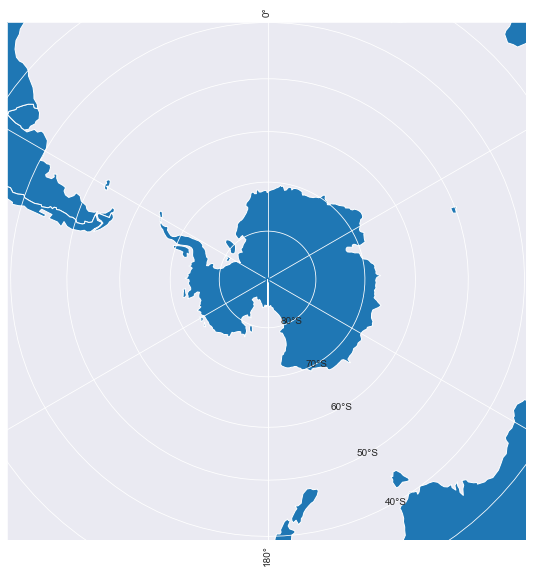

In [3]:
map_proj = ccrs.SouthPolarStereo()
fig = plt.figure(figsize=[8, 8])  # inches
ax = plt.subplot(projection=map_proj)
ax.set_extent([-180, 180, -90, -39.4], ccrs.PlateCarree())
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.04, right=0.95, wspace=0.02)

# ax.add_feature(cartopy.feature.LAND)
# ax.add_feature(cartopy.feature.COASTLINE)
ax.gridlines(draw_labels=True)

world: gpd.GeoDataFrame = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.to_crs(epsg=3031).plot(ax=ax)

sample_df: DataFrame = pd.read_csv('../data/datasets/lter.csv', encoding='unicode_escape')
sample_df.dropna(subset=['x', 'longitude', 'latitude'])
# ax.scatter(sample_df.Longitude, sample_df.Latitude, marker='o', color='b', transform=ccrs.PlateCarree())

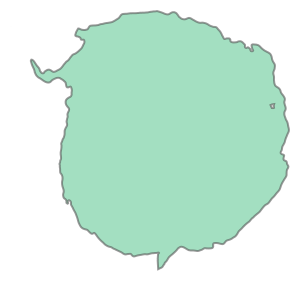

In [71]:
project = pyproj.Transformer.from_crs(pyproj.CRS('EPSG:4326'), pyproj.CRS('EPSG:3031'), always_xy=True).transform

world: gpd.GeoDataFrame = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.to_crs(epsg=3031)
oceania = world[world['continent'] == 'Oceania'].unary_union
south_america: Polygon = world[world['continent'] == 'South America'].unary_union
ant = world[world['continent'] == 'Antarctica'].unary_union
fr = world[world['name'] == 'Fr. S. Antarctic Lands'].unary_union

# world.plot(ax=ax)
southern_ocean = transform(project, Polygon(zip(np.append(np.linspace(start=0, stop=360, num=100000), 0), np.full(100000, -30))))
southern_ocean = southern_ocean - south_america - oceania - fr

zones: gpd.GeoDataFrame = gpd.read_file(geolabel.zones_shapefile)
southern_ocean - zones.iloc[:2].unary_union

In [11]:
# a = ["hi", "hello"]
# b = ["yo", "world"]
# [name + ' ' + sql_type for name, sql_type in zip(dict.keys(), dict.values())]

con = sqlite3.connect("sophy.db")
cur = con.cursor()
z = cur.execute("pragma table_info(a)").fetchall()
# s = cur.execute("pragma table_info(occurrence)").fetchall()
# list(zip(*s))[1]
not z
# def col2(e): return e[1]
# list(map(col2, z))
# list(map(lam, s))

True

In [24]:
# create db with schema2.sql
# then enter lter with that
# LTER
sample_df: DataFrame = pd.read_csv('../data/datasets/lter.csv', encoding='unicode_escape').head(100)
# test = sample_df[['latitude', 'longitude']].to_dict('records')

sample_df["extra"] = sample_df[["latitude", "longitude"]].agg(lambda r: r.to_json(), axis=1)
sample_df.drop(columns=["latitude", "longitude"], inplace=True)
sample_df = sample_df[['studyName', 'timestamp', 'extra']]
# json = sample_df.to_json(orient='index')
# pd.read_json(json)
# df.applymap(lambda row: (row['ID'], row.asDict()))
con = sqlite3.connect("../identifier.sqlite")
sample_df.to_sql("temp", con=con, index=False)


100

In [11]:
sample_df: DataFrame = pd.read_csv('../data/datasets/modified/joy_warren.csv', encoding='utf-8')
sample_df
# chemtax_df = pd.read_csv('../data/datasets/joy_warren_chemtax.csv')
# chemtax_df

,station,sampno,btlnbr,ctd_type,date,time,latitude,longitude,pressure,depth,...,sDIC STDEV,sDIC_Friis,sDIC_Friis STDEV,total_alkalinity,total_alkalinity_stdev,sTA *salinity adj. total alkilinity,sTA STDEV,sTA_Friis,sTA_Friis STDEV,sDIC_Brown
0,001_02,NaN,24,Conv,20141030,1236,-61.0792,-68.6093,50.648,50.160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001_02,NaN,23,Conv,20141030,1236,-61.0792,-68.6093,50.109,49.626,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001_02,1.0,22,Conv,20141030,1236,-61.0792,-68.6093,49.977,49.496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001_02,NaN,21,Conv,20141030,1236,-61.0792,-68.6093,51.025,50.534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,001_02,NaN,20,Conv,20141030,1236,-61.0792,-68.6093,50.965,50.474,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,096_02,3591.0,5,TMW,20141121,324,-65.8500,-71.3753,100.990,100.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2506,096_02,3590.0,4,TMW,20141121,320,-65.8500,-71.3753,201.980,200.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2507,096_02,3588.0,2,TMW,20141121,320,-65.8500,-71.3753,201.980,200.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2508,096_02,3589.0,3,TMW,20141121,317,-65.8500,-71.3753,302.970,300.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
filtered = sample_df.groupby([sample_df["depth"].pct_change().abs().gt(0.15).cumsum(), "station"]).mean()

# s.dropna().sort_values(by='depth')
# filtered = s.groupby(s["depth"].pct_change().abs().gt(0.15).cumsum()).mean()
filtered = filtered.reset_index(level=0, drop=True).reset_index(level=0).sort_values(by='depth')
filtered.sort_values(by=['station', 'depth'])
# What I want is groups based on the vals that are there. I can roughly do a
# ok so the join clearly worked
# I need to be able to connect the jw, jwm, and jwc
# they can be connected by

,station,sampno,btlnbr,date,time,latitude,longitude,pressure,depth,temperature,...,sDIC STDEV,sDIC_Friis,sDIC_Friis STDEV,total_alkalinity,total_alkalinity_stdev,sTA *salinity adj. total alkilinity,sTA STDEV,sTA_Friis,sTA_Friis STDEV,sDIC_Brown
802,001_01,NaN,6.50000,20141030.0,1222.000000,-61.0792,-68.6092,12.949417,12.825750,1.295900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,001_02,1.0,12.26087,20141030.0,1235.739130,-61.0792,-68.6093,50.376565,49.891304,1.293891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
803,001_03,NaN,6.50000,20141030.0,1526.083333,-61.0790,-68.6098,506.266083,500.837167,2.562933,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
804,002_01,4.0,12.00000,20141031.0,432.000000,-62.7033,-69.6905,2.591000,2.566000,-0.677300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
805,002_01,5.0,11.00000,20141031.0,431.000000,-62.7033,-69.6905,10.516000,10.415000,-0.677100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,096_02,3589.0,3.00000,20141121.0,320.000000,-65.8500,-71.3753,201.980000,200.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1160,096_02,3588.0,2.00000,20141121.0,317.000000,-65.8500,-71.3753,302.970000,300.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
799,097_01,3664.5,3.50000,20141121.0,1049.000000,-66.0367,-70.9512,10.223000,10.122000,-1.828850,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800,097_01,3662.5,1.50000,20141121.0,1036.000000,-66.0367,-70.9512,708.713500,700.517500,1.540400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
jwmicro: DataFrame = pd.read_csv('../data/datasets/modified/joy_warren_microscopy.csv', encoding='utf-8')
jwmicro = jwmicro.dropna().sort_values(by='depth')
# s = pd.merge_asof(jwmicro, filtered, on='depth', direction='nearest', tolerance=1)
jwmicro

,experiment,station,depth,group,taxa,biovolume
84,8,058_01,1.8,pennate,pennate,613332
77,8,058_01,1.8,centric,Proboscia,39235
78,8,058_01,1.8,centric,Thalassiosira,3187660
79,8,058_01,1.8,dinoflagellate,dinoflagellate,455
80,8,058_01,1.8,pennate,Banquisia,96678
...,...,...,...,...,...,...
37,5,050_03,25.4,pennate,Pseudo-nitzschia,165508
38,5,050_03,25.4,Phaeocystis,Phaeocystis antarctica,263589832
39,5,050_03,25.4,silicoflagellate,silicoflagellate,304
31,5,050_03,25.4,centric,Guinardia,603307


In [27]:
# jw = station + depth = 251/2510  valid rows (match to JWC)
# jwc = station + depth = 251 valid rows
# jwm = station + depth = 1 valid row to one row in JWC

pd.read_csv("../data/datasets/modified/joy_warren_chemtax.csv")
# sophysql.get_table_cols("sample")
# group by station
# per station do the row bin collapse
# then match station + depth to jwc


,station,depth,chla_ugL,chlorophytes,mixed_flagellates,cryptophytes,Haptophytes1_frac_chla,Haptophytes2_frac_chla,diatoms
0,002_02,3.5,0.246388,0.048396,0.023013,0.034700,0.108427,0.315093,0.470371
1,002_02,9.8,0.236541,0.001490,0.000002,0.032421,0.107206,0.371616,0.487265
2,002_02,24.7,0.226502,0.001383,0.000830,0.028901,0.022378,0.328531,0.617978
3,002_02,50.1,0.229395,0.024303,0.018647,0.032195,0.167372,0.301489,0.455993
4,002_02,76.3,0.219469,0.103945,0.046908,0.021846,0.088668,0.308451,0.430182
...,...,...,...,...,...,...,...,...,...
246,096_01,9.9,0.405852,0.072893,0.006168,0.029439,0.289340,0.169755,0.432405
247,096_01,25.2,0.352817,0.080130,0.000070,0.032084,0.283706,0.163806,0.440204
248,096_01,48.8,0.205766,0.065835,0.000000,0.000000,0.229679,0.282942,0.421544
249,096_01,99.2,0.017057,0.000000,0.000000,0.000000,0.474952,0.000000,0.525048


In [34]:
jwc = pd.read_csv("../data/datasets/modified/joy_warren_chemtax.csv")
jwc['haptophytes'] = jwc['Haptophytes1_frac_chla'] + jwc['Haptophytes2_frac_chla']
jwc = jwc.dropna().sort_values(by='depth')
s = pd.merge_asof(jwc, filtered, by='station', on='depth', direction='nearest', tolerance=1).sort_values(by='station')

s['timestamp'] = pd.to_datetime(s['date'], format='%Y%m%d', errors='coerce').dropna()
s = s.drop(columns=['date', 'time'])
extra = s.columns.difference(sophysql.get_table_cols("sample")).drop(['station'])
s["extra"] = s[extra].agg(lambda r: r[r.notna()].to_json(), axis=1)
s = s.drop(columns=list(extra))
s

# now what's left is to generate an id for these samples, so they can be stored in SQL
# what I need is to assign the samples a key based.
# first do a mergeasof with jwm
# then we should have all the jwc+jw cols together including all we need is the right station with it;s id into the microscopy csv


,station,depth,mixed_flagellates,cryptophytes,diatoms,haptophytes,latitude,longitude,pressure,temperature,salinity,phaeopigments,tot_phosp,nitrate,nitrite,phosphate,silicate,diss_inorg_carbon,timestamp,extra
60,002_02,9.8,0.000002,0.032421,0.487265,0.478822,-62.7033,-69.6903,10.104000,-0.677414,33.799114,0.046404,0.070000,27.78,0.189,1.890,22.600,NaN,2014-10-31,"{""CTDFLUOR_UP"":0.9224714286,""CTDOXY2_UP"":8.049..."
39,002_02,3.5,0.023013,0.034700,0.470371,0.423520,-62.7033,-69.6903,3.751500,-0.677300,33.798900,0.050000,0.066667,NaN,NaN,NaN,NaN,NaN,2014-10-31,"{""CTDFLUOR_UP"":0.90615,""CTDOXY2_UP"":8.04509,""C..."
200,002_02,76.3,0.046908,0.021846,0.430182,0.397119,-62.7033,-69.6903,77.533500,-0.681500,33.799200,0.050000,0.070000,NaN,NaN,NaN,NaN,NaN,2014-10-31,"{""CTDFLUOR_UP"":0.8833,""CTDOXY2_UP"":8.05498,""CT..."
99,002_02,24.7,0.000830,0.028901,0.617978,0.350910,-62.7033,-69.6903,24.887333,-0.677767,33.799067,0.050000,0.063333,NaN,NaN,NaN,NaN,NaN,2014-10-31,"{""CTDFLUOR_UP"":0.9033333333,""CTDOXY2_UP"":8.044..."
223,002_02,100.1,0.015726,0.028563,0.558053,0.357956,-62.7033,-69.6903,101.419500,-0.681550,33.800650,0.050000,0.066667,NaN,NaN,NaN,NaN,NaN,2014-10-31,"{""CTDFLUOR_UP"":0.86,""CTDOXY2_UP"":8.03891,""CTDO..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,096_01,9.9,0.006168,0.029439,0.432405,0.459095,-65.8500,-71.3753,10.098500,-1.709362,33.805200,0.400000,0.066667,28.03,0.198,1.878,NaN,NaN,2014-11-21,"{""CTDFLUOR_UP"":1.5700625,""CTDOXY2_UP"":8.010118..."
209,096_01,99.2,0.000000,0.000000,0.525048,0.474952,-65.8500,-71.3753,100.208000,1.409000,34.363800,0.030000,NaN,35.21,0.146,2.383,65.970,NaN,2014-11-21,"{""CTDFLUOR_UP"":0.0202,""CTDOXY2_UP"":4.76686,""CT..."
1,096_01,1.3,0.004651,0.028932,0.411942,0.469119,-65.8500,-71.3753,1.291000,-1.687700,33.802200,0.370000,0.070000,27.66,0.195,1.853,44.440,NaN,2014-11-21,"{""CTDFLUOR_UP"":1.3039,""CTDOXY2_UP"":8.02862,""CT..."
131,096_01,48.8,0.000000,0.000000,0.421544,0.512621,-65.8500,-71.3753,49.434167,-1.443133,33.945317,0.410000,NaN,30.40,0.274,2.058,51.825,NaN,2014-11-21,"{""CTDFLUOR_UP"":0.5041833333,""CTDOXY2_UP"":7.346..."


In [46]:
s = s.reset_index(drop=True)
mid = sophysql.query("select max(id) from sample")[0][0] + 1
s['id'] = np.arange(mid, mid + len(s))
jwmkey = pd.concat([s['id'], s['station'], s['depth']], axis=1).sort_values(by='depth')
jwmkey

,id,station,depth
214,29761,084_03,1.1
248,29795,096_01,1.3
196,29743,078_03,1.3
206,29753,082_03,1.4
106,29653,048_01,1.4
...,...,...,...
103,29650,046_01,102.6
31,29578,010_01,111.1
94,29641,044_01,150.4
105,29652,048_01,151.1


In [50]:
# jwc_df = pd.merge_asof(jwmicro, jwmkey, by='station', on='depth', direction='nearest', tolerance=1)
# jwc_df
s

,station,depth,mixed_flagellates,cryptophytes,diatoms,haptophytes,latitude,longitude,pressure,temperature,...,phaeopigments,tot_phosp,nitrate,nitrite,phosphate,silicate,diss_inorg_carbon,timestamp,extra,id
0,002_02,9.8,0.000002,0.032421,0.487265,0.478822,-62.7033,-69.6903,10.104000,-0.677414,...,0.046404,0.070000,27.78,0.189,1.890,22.600,NaN,2014-10-31,"{""CTDFLUOR_UP"":0.9224714286,""CTDOXY2_UP"":8.049...",29547
1,002_02,3.5,0.023013,0.034700,0.470371,0.423520,-62.7033,-69.6903,3.751500,-0.677300,...,0.050000,0.066667,NaN,NaN,NaN,NaN,NaN,2014-10-31,"{""CTDFLUOR_UP"":0.90615,""CTDOXY2_UP"":8.04509,""C...",29548
2,002_02,76.3,0.046908,0.021846,0.430182,0.397119,-62.7033,-69.6903,77.533500,-0.681500,...,0.050000,0.070000,NaN,NaN,NaN,NaN,NaN,2014-10-31,"{""CTDFLUOR_UP"":0.8833,""CTDOXY2_UP"":8.05498,""CT...",29549
3,002_02,24.7,0.000830,0.028901,0.617978,0.350910,-62.7033,-69.6903,24.887333,-0.677767,...,0.050000,0.063333,NaN,NaN,NaN,NaN,NaN,2014-10-31,"{""CTDFLUOR_UP"":0.9033333333,""CTDOXY2_UP"":8.044...",29550
4,002_02,100.1,0.015726,0.028563,0.558053,0.357956,-62.7033,-69.6903,101.419500,-0.681550,...,0.050000,0.066667,NaN,NaN,NaN,NaN,NaN,2014-10-31,"{""CTDFLUOR_UP"":0.86,""CTDOXY2_UP"":8.03891,""CTDO...",29551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,096_01,9.9,0.006168,0.029439,0.432405,0.459095,-65.8500,-71.3753,10.098500,-1.709362,...,0.400000,0.066667,28.03,0.198,1.878,NaN,NaN,2014-11-21,"{""CTDFLUOR_UP"":1.5700625,""CTDOXY2_UP"":8.010118...",29793
247,096_01,99.2,0.000000,0.000000,0.525048,0.474952,-65.8500,-71.3753,100.208000,1.409000,...,0.030000,NaN,35.21,0.146,2.383,65.970,NaN,2014-11-21,"{""CTDFLUOR_UP"":0.0202,""CTDOXY2_UP"":4.76686,""CT...",29794
248,096_01,1.3,0.004651,0.028932,0.411942,0.469119,-65.8500,-71.3753,1.291000,-1.687700,...,0.370000,0.070000,27.66,0.195,1.853,44.440,NaN,2014-11-21,"{""CTDFLUOR_UP"":1.3039,""CTDOXY2_UP"":8.02862,""CT...",29795
249,096_01,48.8,0.000000,0.000000,0.421544,0.512621,-65.8500,-71.3753,49.434167,-1.443133,...,0.410000,NaN,30.40,0.274,2.058,51.825,NaN,2014-11-21,"{""CTDFLUOR_UP"":0.5041833333,""CTDOXY2_UP"":7.346...",29796


In [48]:
jwm_df = pd.merge_asof(jwmicro, jwmkey, by='station', on='depth', direction='nearest', tolerance=1)
jwm_df

,experiment,station,depth,group,taxa,biovolume,id
0,8,058_01,1.8,pennate,pennate,613332,29677
1,8,058_01,1.8,centric,Proboscia,39235,29677
2,8,058_01,1.8,centric,Thalassiosira,3187660,29677
3,8,058_01,1.8,dinoflagellate,dinoflagellate,455,29677
4,8,058_01,1.8,pennate,Banquisia,96678,29677
...,...,...,...,...,...,...,...
132,5,050_03,25.4,pennate,Pseudo-nitzschia,165508,29664
133,5,050_03,25.4,Phaeocystis,Phaeocystis antarctica,263589832,29664
134,5,050_03,25.4,silicoflagellate,silicoflagellate,304,29664
135,5,050_03,25.4,centric,Guinardia,603307,29664


In [4]:
# ok so I need to convert all of this into one script
# first I will just take the raw code
# then I will convert it to the right format for reusable code
microscopy = pd.read_csv('../data/datasets/modified/joy_warren_microscopy.csv').dropna()
replace: dict = {'centric': 'diatom', 'pennate': 'diatom', 'unknown diatom': 'diatom',
                 'dinoflagellate': 'dinoflagellate', 'ciliate': 'mixed_flagellate',
                 'silicoflagellate': 'silicoflagellate'}
microscopy['category'] = microscopy['taxa'].replace(replace)
are_taxa = ~microscopy['taxa'].isin(replace.keys())
taxa_list = list(microscopy[are_taxa]['taxa'])
taxa = sophytaxa.query_worms(taxa_list)
# ----------------------------------
category_conditions: list = [
    (taxa['class'] == 'Bacillariophyceae'),  # diatom
    (taxa['genus'] == 'Phaeocystis'),  # phaeo
    (taxa['class'] == 'Dinophyceae'),  # dinoflagellate
    (('superclass' in taxa.columns) and (taxa['superclass'] == 'Dinoflagelleta')),  # dinoflagellate
    (taxa['order'] == 'Dictyochales'),  # silicoflagellate
]

categories = ["diatom", "phaeocystis", "dinoflagellate", "dinoflagellate", "silicoflagellate"]
taxa['category'] = np.select(category_conditions, categories, default='other')
taxa.index = microscopy[are_taxa].index
microscopy.loc[taxa.index, 'category'] = taxa['category']
microscopy['AphiaID'] = taxa['AphiaID']
# -------------------------------------------------
joy_warren: DataFrame = pd.read_csv('../data/datasets/modified/joy_warren.csv', encoding='utf-8')
# group by depth and station: station1([1.7, 1.8, 2.1][9.7. 9.8, 10.2]...), station2...
joy_warren = joy_warren.groupby([joy_warren["depth"].pct_change().abs().gt(0.15).cumsum(), "station"]).mean()
joy_warren = joy_warren.reset_index(level=0, drop=True).reset_index(level=0).sort_values(by='depth')
joy_warren.sort_values(by=['station', 'depth'])
# --------------------------------------------------
jwchemtax = pd.read_csv("../data/datasets/modified/joy_warren_chemtax.csv")
jwchemtax['chemtax_haptophytes'] = jwchemtax['Haptophytes1_frac_chla'] + jwchemtax['Haptophytes2_frac_chla']
jwchemtax = jwchemtax.dropna().sort_values(by='depth')
sample: DataFrame = pd.merge_asof(jwchemtax, joy_warren, by='station', on='depth', direction='nearest', tolerance=1).sort_values(by='station')

sample['timestamp'] = pd.to_datetime(sample['date'], format='%Y%m%d', errors='coerce').dropna().drop(columns=['date', 'time'])
extra = sample.columns.difference(sophysql.get_table_cols("sample")).drop(['station'])
sample["extra"] = sample[extra].agg(lambda r: r[r.notna()].to_json(), axis=1)
sample = sample.drop(columns=list(extra))
# ----------------------------------------------------
sample = sample.reset_index(drop=True)
max_id = sophysql.query("select max(id) from sample")[0][0] + 1
sample['id'] = np.arange(max_id, max_id + len(sample))

jwmkey = pd.concat([sample['id'], sample['station'], sample['depth']], axis=1).sort_values(by='depth')

microscopy = microscopy.sort_values(by='depth')
microscopy = pd.merge_asof(microscopy, jwmkey, by='station', on='depth', direction='nearest', tolerance=1)
microscopy = microscopy.rename({'id': 'sample_id', 'AphiaID': 'aphia_id', 'taxa': 'name', 'group': 'groups'}, axis="columns")
microscopy

C:\Users\Ayush Nag\vault\sophy\sophy\sophytaxa.py:28: UserWarning: No results found by WoRMS database: ['radiolarian']...
  warnings.warn(f"No results found by WoRMS database: {str(no_result[:20])}...")


,experiment,station,depth,groups,name,biovolume,category,aphia_id,sample_id
0,8,058_01,1.8,pennate,pennate,613332,diatom,NaN,29928
1,8,058_01,1.8,centric,Proboscia,39235,diatom,149167.0,29928
2,8,058_01,1.8,centric,Thalassiosira,3187660,diatom,148912.0,29928
3,8,058_01,1.8,dinoflagellate,dinoflagellate,455,dinoflagellate,NaN,29928
4,8,058_01,1.8,pennate,Banquisia,96678,diatom,291402.0,29928
...,...,...,...,...,...,...,...,...,...
132,5,050_03,25.4,pennate,Pseudo-nitzschia,165508,diatom,149151.0,29915
133,5,050_03,25.4,Phaeocystis,Phaeocystis antarctica,263589832,phaeocystis,341585.0,29915
134,5,050_03,25.4,silicoflagellate,silicoflagellate,304,silicoflagellate,NaN,29915
135,5,050_03,25.4,centric,Guinardia,603307,diatom,149111.0,29915


In [5]:
# jwmkey
ratios = microscopy.groupby(['station', 'category', 'depth'])['biovolume'].sum() / microscopy.groupby(['station']).sum()['biovolume']
ratios = ratios.to_frame().unstack(level=1, fill_value=0).droplevel(level=0, axis=1).reset_index()
sample = pd.merge(sample, ratios, on=['station', 'depth'], how='outer')
sample = sample.rename(columns={"diatom": "category_diatom", "phaeocystis": "category_phaeocystis", "dinoflagellate": "category_dinoflagellate", "mixed_flagellate": "category_mixed_flagellate", "silicoflagellate": "category_silicoflagellate"})
sample

,station,depth,chemtax_chlorophytes,chemtax_mixed_flagellates,chemtax_cryptophytes,chemtax_diatoms,chemtax_haptophytes,latitude,longitude,pressure,...,total_alkalinity,timestamp,extra,id,category_diatom,category_dinoflagellate,category_mixed_flagellate,other,category_phaeocystis,category_silicoflagellate
0,002_02,9.8,0.001490,0.000002,0.032421,0.487265,0.478822,-62.7033,-69.6903,10.104000,...,NaN,2014-10-31,"{""CTDFLUOR_UP"":0.9224714286,""CTDOXY2_UP"":8.049...",29798,NaN,NaN,NaN,NaN,NaN,NaN
1,002_02,3.5,0.048396,0.023013,0.034700,0.470371,0.423520,-62.7033,-69.6903,3.751500,...,NaN,2014-10-31,"{""CTDFLUOR_UP"":0.90615,""CTDOXY2_UP"":8.04509,""C...",29799,NaN,NaN,NaN,NaN,NaN,NaN
2,002_02,76.3,0.103945,0.046908,0.021846,0.430182,0.397119,-62.7033,-69.6903,77.533500,...,NaN,2014-10-31,"{""CTDFLUOR_UP"":0.8833,""CTDOXY2_UP"":8.05498,""CT...",29800,NaN,NaN,NaN,NaN,NaN,NaN
3,002_02,24.7,0.001383,0.000830,0.028901,0.617978,0.350910,-62.7033,-69.6903,24.887333,...,NaN,2014-10-31,"{""CTDFLUOR_UP"":0.9033333333,""CTDOXY2_UP"":8.044...",29801,NaN,NaN,NaN,NaN,NaN,NaN
4,002_02,100.1,0.039702,0.015726,0.028563,0.558053,0.357956,-62.7033,-69.6903,101.419500,...,NaN,2014-10-31,"{""CTDFLUOR_UP"":0.86,""CTDOXY2_UP"":8.03891,""CTDO...",29802,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,096_01,9.9,0.072893,0.006168,0.029439,0.432405,0.459095,-65.8500,-71.3753,10.098500,...,NaN,2014-11-21,"{""CTDFLUOR_UP"":1.5700625,""CTDOXY2_UP"":8.010118...",30044,NaN,NaN,NaN,NaN,NaN,NaN
247,096_01,99.2,0.000000,0.000000,0.000000,0.525048,0.474952,-65.8500,-71.3753,100.208000,...,NaN,2014-11-21,"{""CTDFLUOR_UP"":0.0202,""CTDOXY2_UP"":4.76686,""CT...",30045,NaN,NaN,NaN,NaN,NaN,NaN
248,096_01,1.3,0.085356,0.004651,0.028932,0.411942,0.469119,-65.8500,-71.3753,1.291000,...,NaN,2014-11-21,"{""CTDFLUOR_UP"":1.3039,""CTDOXY2_UP"":8.02862,""CT...",30046,NaN,NaN,NaN,NaN,NaN,NaN
249,096_01,48.8,0.065835,0.000000,0.000000,0.421544,0.512621,-65.8500,-71.3753,49.434167,...,NaN,2014-11-21,"{""CTDFLUOR_UP"":0.5041833333,""CTDOXY2_UP"":7.346...",30047,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
microscopy = pd.read_csv("../data/datasets/modified/joy_warren_microscopy.csv", encoding='utf-8').dropna()
replace: dict = {'centric': 'diatom', 'pennate': 'diatom', 'unknown diatom': 'diatom',
                 'dinoflagellate': 'dinoflagellate', 'ciliate': 'mixed_flagellate',
                 'silicoflagellate': 'silicoflagellate'}
microscopy['category'] = microscopy['taxa'].replace(replace)
are_taxa = ~microscopy['taxa'].isin(replace.keys())
taxa: DataFrame = pd.read_csv("../data/worms/joy_warren_worms.csv", encoding='utf-8').rename(sophytaxa.worms_sql)
# ----------------------------------
category_conditions: list = [
    (taxa['class'] == 'Bacillariophyceae'),  # diatom
    (taxa['genus'] == 'Phaeocystis'),  # phaeocystis
    (taxa['class'] == 'Dinophyceae'),  # dinoflagellate
    (('superclass' in taxa.columns) and (taxa['superclass'] == 'Dinoflagelleta')),  # dinoflagellate
    (taxa['order'] == 'Dictyochales'),  # silicoflagellate
]

categories = ["diatom", "phaeocystis", "dinoflagellate", "dinoflagellate", "silicoflagellate"]
taxa['category'] = np.select(category_conditions, categories, default='other')
taxa.index = microscopy[are_taxa].index
microscopy.loc[taxa.index, 'category'] = taxa['category']
microscopy['AphiaID'] = taxa['AphiaID']
# -------------------------------------------------
joy_warren: DataFrame = pd.read_csv("../data/datasets/modified/joy_warren.csv", encoding='utf-8')
# group by depth and station: station1([1.7, 1.8, 2.1][9.7. 9.8, 10.2]...), station2...
joy_warren = joy_warren.groupby([joy_warren["depth"].pct_change().abs().gt(0.15).cumsum(), "station"]).mean()
joy_warren = joy_warren.reset_index(level=0, drop=True).reset_index(level=0).sort_values(by='depth')
joy_warren.sort_values(by=['station', 'depth'])
# --------------------------------------------------
jwchemtax = pd.read_csv("../data/datasets/modified/joy_warren_chemtax.csv")
jwchemtax['chemtax_haptophytes'] = jwchemtax['Haptophytes1_frac_chla'] + jwchemtax['Haptophytes2_frac_chla']
jwchemtax = jwchemtax.dropna().sort_values(by='depth')
sample: DataFrame = pd.merge_asof(jwchemtax, joy_warren, by='station', on='depth', direction='nearest',
                                  tolerance=2).sort_values(by='station')

sample['timestamp'] = pd.to_datetime(sample['date'], format='%Y%m%d', errors='coerce').dropna().drop(
    columns=['date', 'time'])
sample['source_name'] = 'joyw'
extra = sample.columns.difference(sophysql.get_table_cols("sample")).drop(['station'])
sample["extra"] = sample[extra].agg(lambda r: r[r.notna()].to_json(), axis=1)
sample = sample.drop(columns=list(extra))
# ----------------------------------------------------
sample = sample.reset_index(drop=True)
max_id = sophysql.query("select max(id) from sample")['max(id)'][0] + 1
sample['id'] = np.arange(max_id, max_id + len(sample))

jwmkey = pd.concat([sample['id'], sample['station'], sample['depth']], axis=1).sort_values(by='depth')

microscopy = microscopy.sort_values(by='depth')
microscopy = pd.merge_asof(microscopy, jwmkey, by='station', on='depth', direction='nearest', tolerance=1)
microscopy = microscopy.rename({'id': 'sample_id', 'AphiaID': 'aphia_id', 'taxa': 'name', 'group': 'groups'},
                               axis="columns")

category_groups = microscopy.groupby(['station', 'category', 'depth'])['biovolume'].sum()
station_sums = microscopy.groupby(['station']).sum()['biovolume']
category_fractions = category_groups / station_sums
category_fractions = category_fractions.to_frame().unstack(level=1, fill_value=0).droplevel(level=0, axis=1).reset_index()
sample = pd.merge(sample, category_fractions, on=['station', 'depth'], how='outer')
sample = sample.rename(columns={"diatom": "category_diatom", "phaeocystis": "category_phaeocystis",
                                "dinoflagellate": "category_dinoflagellate",
                                "mixed_flagellate": "category_mixed_flagellate",
                                "silicoflagellate": "category_silicoflagellate"})
sample

SOPHY SQL: 0.0 seconds


C:\Users\Ayush Nag\AppData\Local\Temp\ipykernel_23248\784807828.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  joy_warren = joy_warren.groupby([joy_warren["depth"].pct_change().abs().gt(0.15).cumsum(), "station"]).mean()
C:\Users\Ayush Nag\AppData\Local\Temp\ipykernel_23248\784807828.py:54: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  station_sums = microscopy.groupby(['station']).sum()['biovolume']


,station,depth,chemtax_chlorophytes,chemtax_mixed_flagellates,chemtax_cryptophytes,chemtax_diatoms,chemtax_haptophytes,latitude,longitude,pressure,...,timestamp,source_name,extra,id,category_diatom,category_dinoflagellate,category_mixed_flagellate,other,category_phaeocystis,category_silicoflagellate
0,002_02,9.8,0.001490,0.000002,0.032421,0.487265,0.478822,-62.7033,-69.6903,10.104000,...,2014-10-31,joyw,"{""CTDFLUOR_UP"":0.9224714286,""CTDOXY2_UP"":8.049...",29733,NaN,NaN,NaN,NaN,NaN,NaN
1,002_02,3.5,0.048396,0.023013,0.034700,0.470371,0.423520,-62.7033,-69.6903,3.751500,...,2014-10-31,joyw,"{""CTDFLUOR_UP"":0.90615,""CTDOXY2_UP"":8.04509,""C...",29734,NaN,NaN,NaN,NaN,NaN,NaN
2,002_02,76.3,0.103945,0.046908,0.021846,0.430182,0.397119,-62.7033,-69.6903,77.533500,...,2014-10-31,joyw,"{""CTDFLUOR_UP"":0.8833,""CTDOXY2_UP"":8.05498,""CT...",29735,NaN,NaN,NaN,NaN,NaN,NaN
3,002_02,24.7,0.001383,0.000830,0.028901,0.617978,0.350910,-62.7033,-69.6903,24.887333,...,2014-10-31,joyw,"{""CTDFLUOR_UP"":0.9033333333,""CTDOXY2_UP"":8.044...",29736,NaN,NaN,NaN,NaN,NaN,NaN
4,002_02,100.1,0.039702,0.015726,0.028563,0.558053,0.357956,-62.7033,-69.6903,101.419500,...,2014-10-31,joyw,"{""CTDFLUOR_UP"":0.86,""CTDOXY2_UP"":8.03891,""CTDO...",29737,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,096_01,9.9,0.072893,0.006168,0.029439,0.432405,0.459095,-65.8500,-71.3753,10.098500,...,2014-11-21,joyw,"{""CTDFLUOR_UP"":1.5700625,""CTDOXY2_UP"":8.010118...",29979,NaN,NaN,NaN,NaN,NaN,NaN
247,096_01,99.2,0.000000,0.000000,0.000000,0.525048,0.474952,-65.8500,-71.3753,100.208000,...,2014-11-21,joyw,"{""CTDFLUOR_UP"":0.0202,""CTDOXY2_UP"":4.76686,""CT...",29980,NaN,NaN,NaN,NaN,NaN,NaN
248,096_01,1.3,0.085356,0.004651,0.028932,0.411942,0.469119,-65.8500,-71.3753,1.291000,...,2014-11-21,joyw,"{""CTDFLUOR_UP"":1.3039,""CTDOXY2_UP"":8.02862,""CT...",29981,NaN,NaN,NaN,NaN,NaN,NaN
249,096_01,48.8,0.065835,0.000000,0.000000,0.421544,0.512621,-65.8500,-71.3753,49.434167,...,2014-11-21,joyw,"{""CTDFLUOR_UP"":0.5041833333,""CTDOXY2_UP"":7.346...",29982,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
sample: DataFrame = pd.read_csv("../data/datasets/modified/lter.csv", encoding='unicode_escape')
sample['timestamp'] = pd.to_datetime(sample['timestamp']).dropna()
sample

,studyName,timestamp,JulianDay,Event,GridLine,GridStation,RoundedGridLine,RoundedGridStation,GridRegion,NorthSouthRegion,...,O2mlperl,O2umolperl,DIC1,DIC2,Alkalinity1,Alkalinity2,DICTemperature,DICSalinity,notes,Notes2
0,PD91-09,1991-11-07 00:36:00,311.0,1.0,619.0,35.0,600.0,40.0,NC,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*Only T and S available for CTD - from BOPS - ...,NaN
1,PD91-09,1991-11-07 00:36:00,311.0,1.0,619.0,35.0,600.0,40.0,NC,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"**HPLC in datazoo file listed as ug/L, but act...",NaN
2,PD91-09,1991-11-07 00:36:00,311.0,1.0,619.0,35.0,600.0,40.0,NC,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PD91-09,1991-11-07 00:36:00,311.0,1.0,619.0,35.0,600.0,40.0,NC,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PD91-09,1991-11-07 00:36:00,311.0,1.0,619.0,35.0,600.0,40.0,NC,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30389,LMG20-01,2020-02-04 14:42:00,35.0,369.0,600.0,40.0,600.0,40.0,NC,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30390,LMG20-01,2020-02-04 14:42:00,35.0,369.0,600.0,40.0,600.0,40.0,NC,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30391,LMG20-01,2020-02-04 14:42:00,35.0,369.0,600.0,40.0,600.0,40.0,NC,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30392,LMG20-01,2020-02-04 14:42:00,35.0,369.0,600.0,40.0,600.0,40.0,NC,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
sample_df: DataFrame = pd.read_csv('../data/datasets/modified/lter.csv', encoding='utf-8')
sample_df['timestamp'] = pd.to_datetime(sample_df['timestamp'])
sample_df['source_name'] = 'lter'
# drop rows with null time, lat, or long
sample_df = sample_df.dropna(subset=['timestamp', 'longitude', 'latitude'])
# columns to be excluded from the json combined column
exclude_json = ['JulianDay', 'FilterCode']
extra = sample.columns.difference(sophysql.get_table_cols("sample")).drop(exclude_json)
sample_df["extra_json"] = sample_df[extra].agg(lambda r: r[r.notna()].to_json(), axis=1)
sample_df['extra_json']

# sample_df[list(set(sample_df.columns.values.tolist()).intersection(set(sophysql.get_table_cols('sample'))))]

0        {"Alloxanthin":0.0,"BetaCarotene":0.00219978,"...
1        {"BottleNumber":11.0,"Event":1.0,"FilterCode":...
2        {"Alloxanthin":0.0,"BetaCarotene":0.00393294,"...
3        {"Event":1.0,"GridLine":619.0,"GridRegion":"NC...
4        {"Alloxanthin":0.0,"BetaCarotene":0.00564388,"...
                               ...                        
30389    {"Alloxanthin":0.185018728,"AlphaCarotene":0.0...
30390    {"Alloxanthin":0.01849422,"AlphaCarotene":0.0,...
30391    {"Alloxanthin":0.006057019,"AlphaCarotene":0.0...
30392    {"Alloxanthin":0.0,"AlphaCarotene":0.0,"Anther...
30393    {"Alloxanthin":0.0,"AlphaCarotene":0.0,"Anther...
Name: extra_json, Length: 30213, dtype: object

In [48]:
microscopy = pd.read_csv('../data/datasets/modified/jwm.csv', encoding='utf-8').dropna()
sample: DataFrame = pd.read_csv('../data/datasets/modified/jw.csv', encoding='utf-8')

extra = sample.columns.difference(sophysql.get_table_cols("sample")).drop(['station'])
sample["extra_json"] = sample[extra].agg(lambda r: r[r.notna()].to_json(), axis=1)
sample = sample.drop(columns=list(extra))

max_id: int = pd.read_sql("select max(id) from sample", con=con)['max(id)'][0] + 1
sample['id'] = np.arange(max_id, max_id + len(sample))

jwmkey = pd.concat([sample['id'], sample['station'], sample['depth']], axis=1).sort_values(by='depth')

microscopy = microscopy.sort_values(by='depth')
microscopy = pd.merge_asof(microscopy, jwmkey, by='station', on='depth', direction='nearest', tolerance=1)
microscopy = microscopy.rename({'id': 'sample_id', 'AphiaID': 'aphia_id', 'taxa': 'name', 'group': 'groups'},
                               axis="columns")

# TODO: drop duplicates is a temporary fix, need to fix zone overlap
# sample = geolabel.label_zones(sample, 'longitude', 'latitude').drop('index_right', axis=1).drop_duplicates(subset=['id'])
# sample = geolabel.label_sectors(sample, 'longitude')

,experiment,station,depth,group,taxa,biovolume,category,AphiaID,id
0,8,058_01,1.8,pennate,Navicula,43332,diatom,149142.0,29867
1,8,058_01,1.8,centric,Thalassiosira,3187660,diatom,148912.0,29867
2,8,058_01,1.8,pennate,Banquisia,96678,diatom,291402.0,29867
3,8,058_01,1.8,pennate,Fragilariopsis,1018531,diatom,149313.0,29867
4,8,058_01,1.8,pennate,Nitzschia longissima,11423,diatom,149150.0,29867
...,...,...,...,...,...,...,...,...,...
83,5,050_03,25.4,centric,Proboscia,482902,diatom,149167.0,29854
84,5,050_03,25.4,centric,Asteromphalus,597664,diatom,162254.0,29854
85,5,050_03,25.4,centric,Chaetoceros,635555,diatom,148985.0,29854
86,5,050_03,25.4,centric,Guinardia,603307,diatom,149111.0,29854


In [2]:
pd.read_csv('../data/datasets/mod/joy_warren.csv')

,station,source_name,sampno,btlnbr,timestamp,time,latitude,longitude,pressure,depth,...,sDIC STDEV,sDIC_Friis,sDIC_Friis STDEV,total_alkalinity,total_alkalinity_stdev,sTA *salinity adj. total alkilinity,sTA STDEV,sTA_Friis,sTA_Friis STDEV,sDIC_Brown
0,002_02,joyw,21.0,19.0,2014-10-31,502.0,-62.7033,-69.6903,10.104000,9.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,002_02,joyw,16.5,23.5,2014-11-01,503.0,-62.7033,-69.6903,3.751500,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,002_02,joyw,34.5,5.5,2014-11-02,457.0,-62.7033,-69.6903,77.533500,76.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,002_02,joyw,26.0,14.0,2014-11-03,500.0,-62.7033,-69.6903,24.887333,24.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002_02,joyw,36.5,3.5,2014-11-04,455.0,-62.7033,-69.6903,101.419500,100.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,096_01,joyw,3567.5,19.5,2015-02-12,331.0,-65.8500,-71.3753,10.098500,9.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,096_01,joyw,3580.0,7.0,2015-02-13,324.0,-65.8500,-71.3753,100.208000,99.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,096_01,joyw,3563.0,24.0,2015-02-14,332.0,-65.8500,-71.3753,1.291000,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,096_01,joyw,3575.5,11.5,2015-02-15,328.0,-65.8500,-71.3753,49.434167,48.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
joy_warren: DataFrame = pd.read_csv('../data/datasets/modified/joy_warren.csv', encoding='utf-8')
# group by depth and station: station1([1.7, 1.8, 2.1][9.7. 9.8, 10.2]...), station2...
joy_warren = joy_warren.groupby([joy_warren["depth"].pct_change().abs().gt(0.15).cumsum(), "station"]).mean(numeric_only=True)
joy_warren = joy_warren.reset_index(level=0, drop=True).reset_index(level=0).sort_values(by='depth')
joy_warren = joy_warren.sort_values(by=['depth'])
joy_warren

,station,sampno,btlnbr,date,time,latitude,longitude,pressure,depth,temperature,...,sDIC STDEV,sDIC_Friis,sDIC_Friis STDEV,total_alkalinity,total_alkalinity_stdev,sTA *salinity adj. total alkilinity,sTA STDEV,sTA_Friis,sTA_Friis STDEV,sDIC_Brown
664,084_03,3140.0,24.0,20141118.0,2241.000000,-64.2993,-71.5488,1.144000,1.132000,-1.697400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,078_03,2886.0,24.0,20141117.0,1525.000000,-65.4100,-69.2895,1.278000,1.265000,-1.823200,...,0.875471,2209.609228,0.875471,NaN,NaN,NaN,NaN,NaN,NaN,2209.609228
787,096_01,3563.0,24.0,20141121.0,332.000000,-65.8500,-71.3753,1.291000,1.279000,-1.687700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
956,034_02,823.0,12.0,20141105.0,357.000000,-63.5427,-64.8898,1.309000,1.297000,-1.767300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,024_01,611.0,21.0,20141103.0,2216.000000,-64.0450,-63.5837,1.348000,1.335000,-1.528300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,057_01,1763.0,2.0,20141111.0,750.000000,-66.7570,-72.3323,1521.864000,1501.283667,0.938867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,010_05,285.5,1.5,20141101.0,1728.000000,-63.9670,-66.8982,1525.041500,1504.700000,0.858900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,008_03,230.0,1.0,20141101.0,619.000000,-63.6478,-67.5752,1533.124000,1512.683000,1.282700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
955,034_01,821.0,2.0,20141105.0,36.666667,-63.5395,-64.8858,1602.002667,1580.383000,0.634800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pd.read_csv('../data/datasets/modified/joy_warren_chemtax.csv')

,station,depth,chla_ugL,chemtax_chlorophytes,chemtax_mixed_flagellates,chemtax_cryptophytes,Haptophytes1_frac_chla,Haptophytes2_frac_chla,chemtax_diatoms
0,002_02,3.5,0.246388,0.048396,0.023013,0.034700,0.108427,0.315093,0.470371
1,002_02,9.8,0.236541,0.001490,0.000002,0.032421,0.107206,0.371616,0.487265
2,002_02,24.7,0.226502,0.001383,0.000830,0.028901,0.022378,0.328531,0.617978
3,002_02,50.1,0.229395,0.024303,0.018647,0.032195,0.167372,0.301489,0.455993
4,002_02,76.3,0.219469,0.103945,0.046908,0.021846,0.088668,0.308451,0.430182
...,...,...,...,...,...,...,...,...,...
246,096_01,9.9,0.405852,0.072893,0.006168,0.029439,0.289340,0.169755,0.432405
247,096_01,25.2,0.352817,0.080130,0.000070,0.032084,0.283706,0.163806,0.440204
248,096_01,48.8,0.205766,0.065835,0.000000,0.000000,0.229679,0.282942,0.421544
249,096_01,99.2,0.017057,0.000000,0.000000,0.000000,0.474952,0.000000,0.525048


In [37]:
result = None
for file in os.listdir('../data/worms/'):
    if file.endswith(".csv"):
        new = pd.read_csv('../data/worms/' + file, encoding='utf-8').drop_duplicates(subset=['AphiaID']).rename(
        columns=sophytaxa.worms_sql)
        result = pd.concat([result,new], ignore_index=True)
result.drop_duplicates(subset=['aphia_id'])

,aphia_id,url,scientific_name,authority,status,unacceptreason,taxonRankID,rank,valid_AphiaID,valid_name,...,citation,lsid,isMarine,isBrackish,isFreshwater,isTerrestrial,isExtinct,match_type,modified,original
0,149167.0,https://www.marinespecies.org/aphia.php?p=taxd...,Proboscia,"Bo G. Sundström, 1986",accepted,NaN,180.0,Genus,149167.0,Proboscia,...,"Kociolek, J.P.; Blanco, S.; Coste, M.; Ector, ...",urn:lsid:marinespecies.org:taxname:149167,1.0,NaN,NaN,0.0,0.0,exact,2017-02-23T10:36:53.780Z,Proboscia
1,148912.0,https://www.marinespecies.org/aphia.php?p=taxd...,Thalassiosira,"P.T. Cleve, 1873 emend. Hasle, 1973",accepted,NaN,180.0,Genus,148912.0,Thalassiosira,...,"Kociolek, J.P.; Blanco, S.; Coste, M.; Ector, ...",urn:lsid:marinespecies.org:taxname:148912,1.0,1.0,1.0,0.0,0.0,exact,2018-01-02T17:46:52.927Z,Thalassiosira
2,149313.0,https://www.marinespecies.org/aphia.php?p=taxd...,Fragilariopsis,"F. Hustedt in A. Schmidt et al., 1913",accepted,NaN,180.0,Genus,149313.0,Fragilariopsis,...,"Kociolek, J.P.; Blanco, S.; Coste, M.; Ector, ...",urn:lsid:marinespecies.org:taxname:149313,1.0,NaN,0.0,0.0,0.0,exact,2018-08-11T15:19:58.250Z,Fragilariopsis
3,149142.0,https://www.marinespecies.org/aphia.php?p=taxd...,Navicula,"J.B.M. Bory de Saint-Vincent, 1822",accepted,NaN,180.0,Genus,149142.0,Navicula,...,"Kociolek, J.P.; Blanco, S.; Coste, M.; Ector, ...",urn:lsid:marinespecies.org:taxname:149142,1.0,1.0,1.0,1.0,0.0,exact,2018-03-22T00:26:10.497Z,Navicula
4,341585.0,https://www.marinespecies.org/aphia.php?p=taxd...,Phaeocystis antarctica,"Karsten, 1905",accepted,NaN,220.0,Species,341585.0,Phaeocystis antarctica,...,"Guiry, M.D. & Guiry, G.M. (2022). AlgaeBase. W...",urn:lsid:marinespecies.org:taxname:341585,1.0,NaN,NaN,NaN,NaN,exact,2015-06-26T12:00:51.270Z,Phaeocystis antarctica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,447746.0,https://www.marinespecies.org/aphia.php?p=taxd...,Tryblionella compressa,"(J.W.Bailey) M.Poulin, 1990",unassessed,NaN,220.0,Species,978142.0,Pyxidicula compressa var. compressa,...,"Kociolek, J.P.; Blanco, S.; Coste, M.; Ector, ...",urn:lsid:marinespecies.org:taxname:447746,1.0,NaN,NaN,NaN,NaN,exact,2018-02-01T09:09:54.613Z,Tryblionella compressa
758,341606.0,https://www.marinespecies.org/aphia.php?p=taxd...,Tetraparma pelagica,"B.C.Booth & H.J.Marchant, 1987",accepted,NaN,220.0,Species,341606.0,Tetraparma pelagica,...,"Guiry, M.D. & Guiry, G.M. (2022). AlgaeBase. W...",urn:lsid:marinespecies.org:taxname:341606,1.0,NaN,NaN,NaN,NaN,exact,2015-06-26T12:00:51.270Z,Tetraparma pelagica
759,341391.0,https://www.marinespecies.org/aphia.php?p=taxd...,Triparma columacea,"B.C.Booth, 1987",accepted,NaN,220.0,Species,341391.0,Triparma columacea,...,"Guiry, M.D. & Guiry, G.M. (2022). AlgaeBase. W...",urn:lsid:marinespecies.org:taxname:341391,1.0,NaN,NaN,NaN,NaN,exact,2015-06-26T12:00:51.270Z,Triparma columacea
760,157463.0,https://www.marinespecies.org/aphia.php?p=taxd...,Dictyocha fibula,"Ehrenberg, 1839",accepted,NaN,220.0,Species,157463.0,Dictyocha fibula,...,"Guiry, M.D. & Guiry, G.M. (2022). AlgaeBase. W...",urn:lsid:marinespecies.org:taxname:157463,1.0,NaN,NaN,NaN,1.0,exact,2019-10-04T07:04:14.930Z,Dictyocha fibula


In [12]:
x = pd.read_csv('../data/datasets/mod/lter.csv')
x['percent_phaeo'] = x['chemtax_haptophytes']
x['percent_diatom'] = x['chemtax_diatoms']
x['percent_other'] = x['chemtax_prasinophytes'] + x['chemtax_mixed_flagellates'] + x['chemtax_cryptophytes']
x.to_csv('../data/datasets/mod/lter.csv', index=False)
# xr.open_dataset("../data/185.nc")

In [5]:
con = sqlite3.connect("sophy.db")
writer = pd.ExcelWriter('sophy.xlsx', engine='xlsxwriter')
# Convert the dataframe to an XlsxWriter Excel object.
pd.read_sql('select * from sample', con=con).to_excel(writer, sheet_name='sample')
pd.read_sql('select * from microscopy', con=con).to_excel(writer, sheet_name='microscopy')
pd.read_sql('select * from occurrence', con=con).to_excel(writer, sheet_name='occurrence')
pd.read_sql('select * from taxonomy', con=con).to_excel(writer, sheet_name='taxonomy')
# Close the Pandas Excel writer and output the Excel file.
writer.close()

<AxesSubplot: >

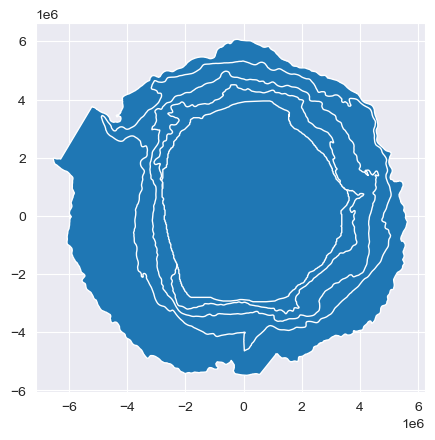

In [25]:
# geolabel.create_fronts_zones_shapes()
gpd.read_file("../data/out/shapefiles/fronts/so_fronts.shp").plot()

In [16]:
pd.read_csv('../data/in/units.csv')

TypeError: read_csv() got an unexpected keyword argument 'index'

In [14]:
writer = pd.ExcelWriter('temp.xlsx', engine='xlsxwriter')
testdata = pd.DataFrame([['tom', 10], ['nick', 15], ['juli', 14]], columns=['Name', 'Age'])
testdata.columns = [['meters', 'mg/m^3'], testdata.columns]
# rename_dct = dict.fromkeys(testdata.loc[:,testdata.columns.str.contains('^Unnamed')], '')
# testdata = testdata.rename(columns=rename_dct)  # <== renaming 'Unnamed' columns to blank space
testdata.to_excel(writer, sheet_name='thing')
writer.sheets['thing'].set_row(2, None, None, {'hidden': True})
# writer.save()
writer.close()
# testdata

In [2]:
def so_ax():
  map_proj = ccrs.SouthPolarStereo()
  fig = plt.figure(figsize=[5, 5])  # inches
  ax = plt.subplot(projection=map_proj)
  ax.set_extent([-180, 180, -90, -40], ccrs.PlateCarree())
  fig.subplots_adjust(bottom=0.05, top=0.95, left=0.04, right=0.95, wspace=0.02)
  return ax 

In [4]:
# Inspect salinity at time=10 (6 years x 12 months/year avg = 72 total) and depth = 25m
sal = xr.open_dataset('../data/in/bsose/bsose_i133_2013to2018_monthly_Salt.nc')
sal['SALT']

<xarray.DataArray 'SALT' (time: 72, Z: 52, YC: 588, XC: 2160)>
[4755179520 values with dtype=float32]
Coordinates:
    iter     (time) int64 ...
  * time     (time) datetime64[ns] 2013-01-30T20:40:00 ... 2018-12-31T10:20:00
  * XC       (XC) float32 0.08333 0.25 0.4167 0.5833 ... 359.4 359.6 359.8 359.9
  * YC       (YC) float32 -77.98 -77.95 -77.91 -77.88 ... -30.02 -29.87 -29.72
  * Z        (Z) float32 -2.1 -6.7 -12.15 -18.55 ... -5e+03 -5.4e+03 -5.8e+03
    Depth    (YC, XC) float32 ...
    rA       (YC, XC) float32 ...
    drF      (Z) float32 ...
    hFacC    (Z, YC, XC) float32 ...
Attributes:
    units:          psu
    long_name:      Salinity
    standard_name:  SALT

[]

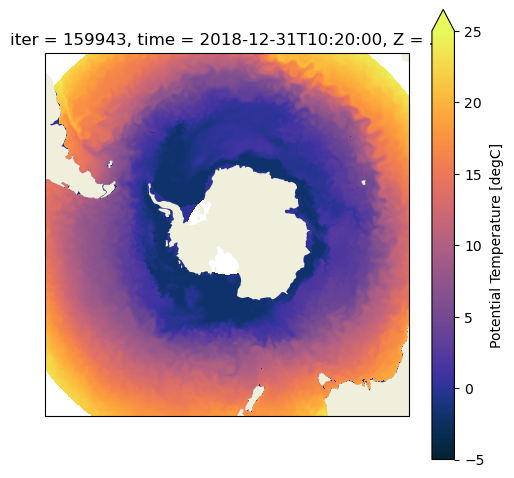

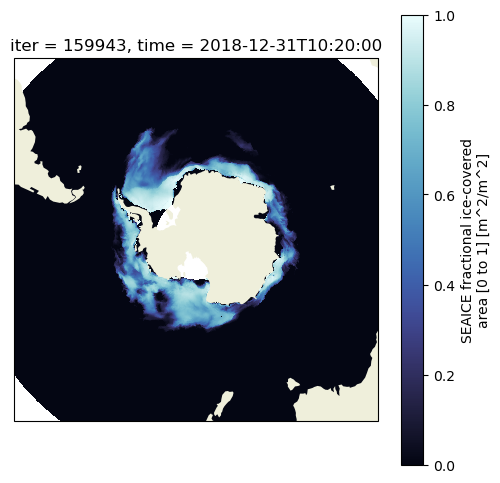

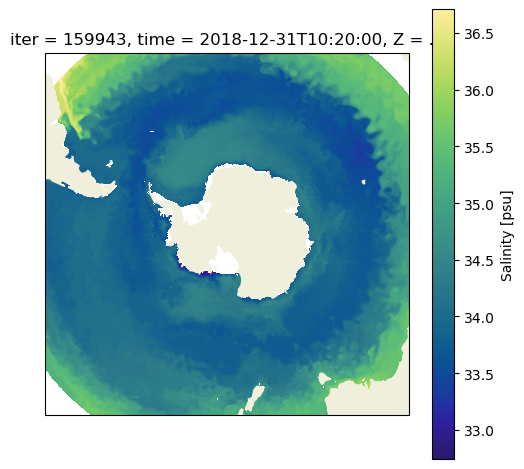

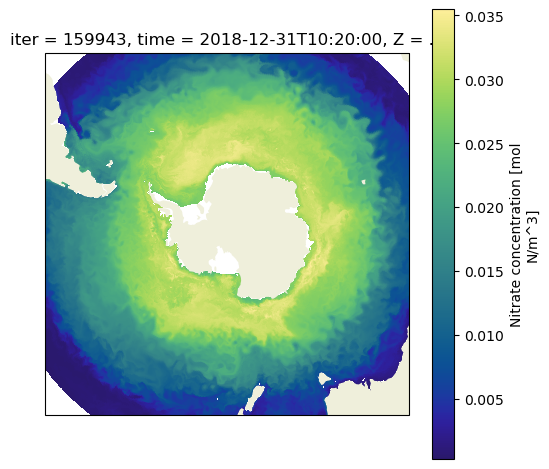

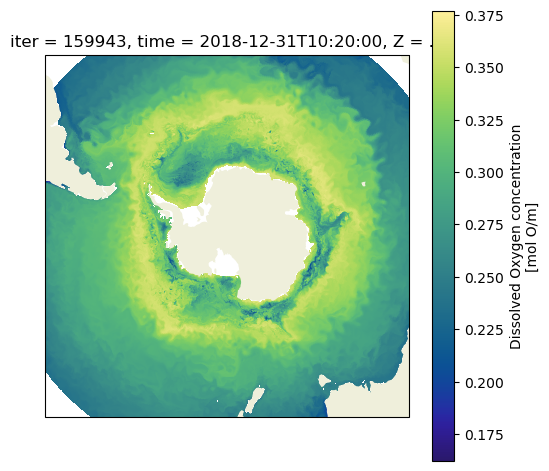

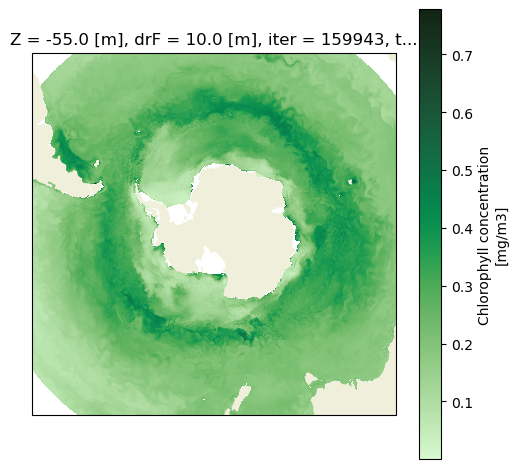

In [37]:
ax = so_ax()
temperature = xr.open_dataset('../data/in/bsose/bsose_i133_2013to2018_monthly_Theta.nc')
temperature = temperature['THETA'][71, 0, :, :]
temperature.plot.pcolormesh(x="XC", y="YC", ax=ax, transform=ccrs.PlateCarree(), cmap=cmocean.cm.thermal, vmin=-5, vmax=25)
ax.add_feature(cartopy.feature.LAND, zorder=2)
ax.plot()

ax = so_ax()
sie = xr.open_dataset('../data/in/bsose/bsose_i133_2013to2018_monthly_SeaIceArea.nc')
sie = sie['SIarea'][71, : , :]
sie.plot.pcolormesh(x="XC", y="YC", ax=ax, transform=ccrs.PlateCarree(), cmap=cmocean.cm.ice)
ax.add_feature(cartopy.feature.LAND, zorder=2)
ax.plot()

ax = so_ax()
sal = xr.open_dataset('../data/in/bsose/bsose_i133_2013to2018_monthly_Salt.nc')
sal = sal['SALT'][71, 7, :, :]
sal_f = sal.where(sal > 30)
sal_f.plot.pcolormesh(x="XC", y="YC", ax=ax, transform=ccrs.PlateCarree(), cmap=cmocean.cm.haline)
ax.add_feature(cartopy.feature.LAND, zorder=2)
ax.plot()

ax = so_ax()
no3 = xr.open_dataset('../data/in/bsose/bsose_i133_2013to2018_monthly_NO3.nc')
no3 = no3['TRAC04'][71, 7, :, :]
no3_f = no3.where(no3 > 0)
no3_f.plot.pcolormesh(x="XC", y="YC", ax=ax, transform=ccrs.PlateCarree(), cmap=cmocean.cm.haline)
ax.add_feature(cartopy.feature.LAND, zorder=2)
ax.plot()

ax = so_ax()
o2 = xr.open_dataset('../data/in/bsose/bsose_i133_2013to2018_monthly_O2.nc')
o2 = o2['TRAC03'][71, 7, :, :]
o2_f = o2.where(o2 > 0)
o2_f.plot.pcolormesh(x="XC", y="YC", ax=ax, transform=ccrs.PlateCarree(), cmap=cmocean.cm.haline)
ax.add_feature(cartopy.feature.LAND, zorder=2)
ax.plot()

ax = so_ax()
chla = xr.open_dataset('../data/in/bsose/bsose_i133_2013to2018_monthly_Chl.nc')
chla = chla['BLGCHL'][71, 7, :, :]
chl_f = chla.where(chla < 0.8).where(chla > 0)
chl_f.plot.pcolormesh(x="XC", y="YC", ax=ax, transform=ccrs.PlateCarree(), cmap=cmocean.cm.algae)
ax.add_feature(cartopy.feature.LAND, zorder=2)
ax.plot()

[]

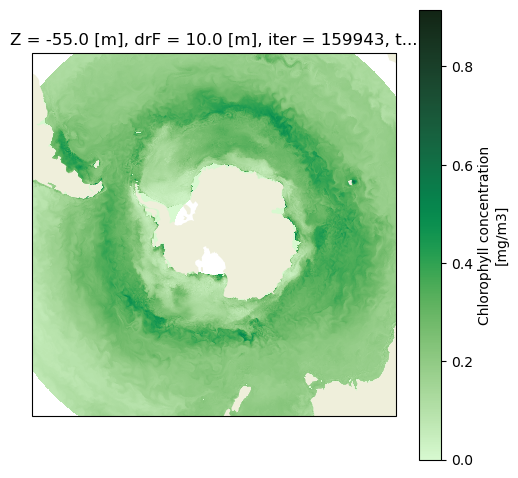

In [36]:
ax = so_ax()
chla = xr.open_dataset('../data/in/bsose/bsose_i133_2013to2018_monthly_Chl.nc')
chla = chla['BLGCHL'][71, 7, :, :]
# chl_f = chla.where(chla < 1.2).where(chla > 0)
chla.plot.pcolormesh(x="XC", y="YC", ax=ax, transform=ccrs.PlateCarree(), cmap=cmocean.cm.algae)
ax.add_feature(cartopy.feature.LAND, zorder=2)
ax.plot()

In [8]:
temperature = xr.open_dataset('../data/in/bsose/bsose_i133_2013to2018_monthly_Theta.nc')
temperature = temperature['THETA'][71, 0, :, :]
temperature = temperature.where(temperature != 'nan', other=-9999, drop=True)

<xarray.DataArray 'THETA' (YC: 588, XC: 2160)>
array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [20.613026, 20.563791, 20.522131, ..., 20.767061, 20.714973,
        20.665775],
       [20.687859, 20.64687 , 20.608856, ..., 20.82436 , 20.77538 ,
        20.731833],
       [20.719414, 20.68239 , 20.646872, ..., 20.862904, 20.809902,
        20.762154]], dtype=float32)
Coordinates:
    iter     int64 159943
    time     datetime64[ns] 2018-12-31T10:20:00
  * XC       (XC) float32 0.08333 0.25 0.4167 0.5833 ... 359.4 359.6 359.8 359.9
  * YC       (YC) float32 -77.98 -77.95 -77.91 -77.88 ... -30.02 -29.87 -29.72
    Z        float32 -2.1
    Depth    (YC, XC) float32 0.0 0.0 0.0 0.0 ... 4.8e+03 4.8e+03 4.737e+03
    rA       (YC, XC) float32 1.488e+07 1.488e+07 ... 2.921e+08 2.921e+08
    drF      float32 4.2
    hFacC    (YC, XC) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0 1.0
Attributes:
    units:          degC
    long_name:      Potential Temperature
    standard_name:  THETA

In [21]:
xr.open_dataset('../data/in/bsose/bsose_i133_2013to2018_monthly_Salt.nc')["SALT"][71, 7, :, :]

<xarray.DataArray 'SALT' (YC: 588, XC: 2160)>
[1270080 values with dtype=float32]
Coordinates:
    iter     int64 ...
    time     datetime64[ns] 2018-12-31T10:20:00
  * XC       (XC) float32 0.08333 0.25 0.4167 0.5833 ... 359.4 359.6 359.8 359.9
  * YC       (YC) float32 -77.98 -77.95 -77.91 -77.88 ... -30.02 -29.87 -29.72
    Z        float32 -55.0
    Depth    (YC, XC) float32 ...
    rA       (YC, XC) float32 ...
    drF      float32 ...
    hFacC    (YC, XC) float32 ...
Attributes:
    units:          psu
    long_name:      Salinity
    standard_name:  SALT

In [6]:
chla

<xarray.DataArray 'BLGCHL' (YC: 588, XC: 2160)>
array([[0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       ...,
       [0.098856, 0.099978, 0.101066, ..., 0.098203, 0.097866, 0.097978],
       [0.099439, 0.100892, 0.102537, ..., 0.098132, 0.09842 , 0.098544],
       [0.099673, 0.101176, 0.103095, ..., 0.097451, 0.098172, 0.098685]],
      dtype=float32)
Coordinates:
  * XC       (XC) float32 0.08333 0.25 0.4167 0.5833 ... 359.4 359.6 359.8 359.9
  * YC       (YC) float32 -77.98 -77.95 -77.91 -77.88 ... -30.02 -29.87 -29.72
    Z        float32 -2.1
    Depth    (YC, XC) float32 ...
    rA       (YC, XC) float32 ...
    drF      float32 ...
    hFacC    (YC, XC) float32 ...
    iter     int64 ...
    time     datetime64[ns] 2018-12-31T10:20:00
Attributes:
    units:          mg/m3
    long_name:      Chlorophyll concentration
    standard_name:  BLGCHL

In [55]:
(sal.where(sal != 0, other=-9999) != -9999).all()

<xarray.DataArray 'SALT' ()>
array(False)
Coordinates:
    iter     int64 159943
    time     datetime64[ns] 2018-12-31T10:20:00
    Z        float32 -327.0
    drF      float32 30.0

In [28]:
# np.count_nonzero(~np.isnan(temperature))
# temperature = temperature.where(temperature != np.float32(np.nan), other=-9999)
# sie = sie.where(sie != np.float32(np.nan), other=-9999)
# sal = sal.where(sal != np.float32(np.nan), other=-9999)
# no3 = no3.where(no3 != np.float32(np.nan), other=-9999)
# o2 = o2.where(o2 != np.float32(np.nan), other=-9999)

sal = sal.where(sal != 0, other=-9999)
no3 = no3.where(no3 != 0, other=-9999)
o2 = o2.where(o2 != 0, other=-9999)

temperature.to_netcdf('../data/out/cnn_input_layers/sst.nc')
sie.to_netcdf('../data/out/cnn_input_layers/sea_ice_extent.nc')
sal.to_netcdf('../data/out/cnn_input_layers/salinity.nc')
no3.to_netcdf('../data/out/cnn_input_layers/nitrate.nc')
o2.to_netcdf('../data/out/cnn_input_layers/oxygen.nc')
chla.to_netcdf('../data/out/cnn_input_layers/chlorophyll.nc')

In [87]:
sal = xr.open_dataset('../data/in/bsose/bsose_i133_2013to2018_monthly_Salt.nc')
sal = sal['SALT'][71, 25, :, :]
# sal = sal.where(sal != 0, other=-9999, drop=True)
# sal.where(sal == 0).size
# np.count_nonzero(~np.isnan(sal))

In [ ]:
phytobase = pd.read_csv('../data/in/datasets/mod/phytobase.csv')
phytobase['timestamp'] = pd.to_datetime(phytobase['timestamp'], errors='coerce')

In [ ]:
phytobase = phytobase.dropna(subset=['AphiaID', 'depth'])
austral_summer = (12, 1, 2)
phytobase = phytobase[phytobase['timestamp'].dt.month.isin(austral_summer)]
phytobase = phytobase.filter(['scientificname', 'longitude', 'latitude', 'depth',
       'taxonRank', 'occurrenceStatus', 'phylum', 'class', 'timestamp', 'AphiaID'])
# phytobase['scientificname'].value_counts().head(100)
phytobase

In [ ]:
phytobase.to_csv('../data/out/cnn_input_layers/phytobase_occurrence.csv', index=False)

In [5]:
temperature.rio.write_crs(ccrs.SouthPolarStereo(), inplace=True)

<xarray.DataArray 'THETA' (YC: 588, XC: 2160)>
array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       ...,
       [20.613026, 20.563791, 20.522131, ..., 20.767061, 20.714973, 20.665775],
       [20.687859, 20.64687 , 20.608856, ..., 20.82436 , 20.77538 , 20.731833],
       [20.719414, 20.68239 , 20.646872, ..., 20.862904, 20.809902, 20.762154]],
      dtype=float32)
Coordinates:
    iter         int64 159943
    time         datetime64[ns] 2018-12-31T10:20:00
  * XC           (XC) float32 0.08333 0.25 0.4167 0.5833 ... 359.6 359.8 359.9
  * YC           (YC) float32 -77.98 -77.95 -77.91 ... -30.02 -29.87 -29.72
    Z            float32 -2.1
    Depth        (YC, XC) float32 ...
    rA           (YC, XC) float32 ...
    drF          float32 4.2
    hFacC        (YC, XC) float32 ...
    spatial_ref  int32 0
Attributes:
    units:          degC
    long_name:      Potential Temperature
    standard_name:  THETA

In [24]:
data = xr.open_dataset('../data/out/cnn_input_layers/nitrate.nc')

In [35]:
data.variables['TRAC04'][:].fillna(-9999)

<xarray.Variable (YC: 588, XC: 2160)>
array([[-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
        -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
       [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
        -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
       [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
        -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
       ...,
       [ 1.0052842e-02,  9.9943690e-03,  9.9529857e-03, ...,
         1.0436716e-02,  1.0282016e-02,  1.0141354e-02],
       [ 1.0197330e-02,  1.0159024e-02,  1.0146372e-02, ...,
         1.0510612e-02,  1.0398178e-02,  1.0276124e-02],
       [ 1.0310094e-02,  1.0291671e-02,  1.0304394e-02, ...,
         1.0490501e-02,  1.0420553e-02,  1.0360030e-02]], dtype=float32)
Attributes:
    units:          mol N/m^3
    long_name:      Nitrate concentration
    standard_name:  TRAC04

In [36]:
def netcdf_to_asc(nc_path, variable_name, asc_path):
  # Open the netCDF file and read the data
  nc = xr.open_dataset(nc_path)
  data = nc.variables[variable_name][:].fillna(-9999)

  # Get the geospatial information from the netCDF file
  lon = nc.variables['XC'][:]
  lat = nc.variables['YC'][:]
  lon, lat = np.meshgrid(lon, lat)
  transform = rasterio.transform.from_bounds(lon.min(), lat.min(), lon.max(), lat.max(), data.shape[1], data.shape[0])

  # Write the data to an ESRI raster file
  profile = {'driver': 'AAIGrid', 'dtype': 'float32', 'nodata': -9999, 'width': data.shape[1], 'height': data.shape[0], 'count': 1, 'crs': ccrs.SouthPolarStereo(), 'transform': transform}
  with rasterio.open(asc_path, 'w', **profile) as dst:
      dst.write(data.astype('float32'), 1)

In [37]:
temperature.rio.write_crs(ccrs.SouthPolarStereo(), inplace=True)
sie.rio.write_crs(ccrs.SouthPolarStereo(), inplace=True)
sal.rio.write_crs(ccrs.SouthPolarStereo(), inplace=True)
no3.rio.write_crs(ccrs.SouthPolarStereo(), inplace=True)
o2.rio.write_crs(ccrs.SouthPolarStereo(), inplace=True)

# netcdf_to_asc('../data/out/cnn_input_layers/sst.nc', 'THETA', '../data/out/cnn_input_layers/sst.asc')
# netcdf_to_asc('../data/out/cnn_input_layers/sea_ice_extent.nc', 'SIarea', '../data/out/cnn_input_layers/sea_ice_extent.asc')
# netcdf_to_asc('../data/out/cnn_input_layers/salinity.nc', 'SALT', '../data/out/cnn_input_layers/salinity.asc')
# netcdf_to_asc('../data/out/cnn_input_layers/nitrate.nc', 'TRAC04', '../data/out/cnn_input_layers/nitrate.asc')
# netcdf_to_asc('../data/out/cnn_input_layers/oxygen.nc', 'TRAC03', '../data/out/cnn_input_layers/oxygen.asc')

# gdal_translate -of AAIGrid -a_srs EPSG:3031 NETCDF:"sst.nc":THETA sst.asc
# gdal_translate -of AAIGrid -a_srs EPSG:3031 NETCDF:"sea_ice_extent.nc":SIarea sea_ice_extent.asc
# gdal_translate -of AAIGrid -a_srs EPSG:3031 NETCDF:"salinity.nc":SALT salinity.asc
# gdal_translate -of AAIGrid -a_srs EPSG:3031 NETCDF:"nitrate.nc":TRAC04 nitrate.asc
# gdal_translate -of AAIGrid -a_srs EPSG:3031 NETCDF:"oxygen.nc":TRAC03 oxygen.asc



In [44]:
z = rioxarray.open_rasterio('../data/out/cnn_input_layers/max_ent_layers_in/nitrate.asc')

In [58]:
# z.where(z < 20).where(z > 40).values[0].shape
(z != np.nan).all()

<xarray.DataArray 'TRAC04' ()>
array(True)
Coordinates:
    spatial_ref  int32 0

In [26]:
type(np.float32(np.nan))

numpy.float32